# **Analysis of car-related data**

### **Necessary imports**

In [274]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

### **path setting**

In [275]:
DATA_DIR = os.path.abspath('data')

In [276]:
df = pd.read_csv(os.path.join(DATA_DIR, "car_data.csv"))
df_v3 = pd.read_csv(os.path.join(DATA_DIR, "car_details_v3.csv"))
df_v4 = pd.read_csv(os.path.join(DATA_DIR, "car_details_v4.csv"))
df_cars_details_dekho = pd.read_csv(os.path.join(DATA_DIR, "CAR_DETAILS_FROM_CAR_DEKHO.csv"))

### **Initial data inspection**

In [277]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [278]:
df_cars_details_dekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [279]:
df_v3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [280]:
df_v4.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [281]:
print("\033[1m columns of car data: \033[0m", list(df.columns))
print("\n")
print("\033[1mcolumns of cardetails v3 motor: \033[0m",list(df_v3.columns))
print("\n")
print("\033[1mcolumns of car details v4 motor: \033[0m", list(df_v4.columns))
print("\n")
print("\033[1mcolumns of car details from car dekho: \033[0m", list(df_cars_details_dekho.columns))


 columns of car data:  ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


columns of cardetails v3 motor:  ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


columns of car details v4 motor:  ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


columns of car details from car dekho:  ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [282]:
car_data_shape = df.shape
car_details_v3_shape = df_v3.shape
car_details_v4_shape = df_v4.shape
car_details_dekho_shape = df_cars_details_dekho.shape

print("\033[1mcar data shape: \033[0m", car_data_shape)
print("\033[1mcar details v3 shape: \033[0m", car_details_v3_shape)
print("\033[1mcar details v4 shape: \033[0m", car_details_v4_shape)
print("\033[1mcar details dekho shape: \033[0m", car_details_dekho_shape)


car data shape:  (301, 9)
car details v3 shape:  (8128, 13)
car details v4 shape:  (2059, 20)
car details dekho shape:  (4340, 8)


In [283]:
(df.describe())

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [284]:
df_v3.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [285]:
df_v4.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [286]:
df_cars_details_dekho.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [287]:
# Converting price from rupees to dollars
conversion_rate = 0.014

df_cars_details_dekho['price in $'] = df_cars_details_dekho['selling_price'] * conversion_rate
df['price in $'] = df['Selling_Price'] * conversion_rate
df_v3['price in $'] = df_v3['selling_price'] * conversion_rate
df_v4['price in $'] = df_v4['Price'] * conversion_rate

In [288]:
## extracting the power from the max power column

df_v3['max power in bhp'] = df_v3['max_power'].str.extract('(\d+)').astype(float)
df_v4['max power in bhp'] = df_v4['Max Power'].str.extract('(\d+)').astype(float)

In [289]:
df['Brand'] = df["Car_Name"].str.split().str[0]
df_v3['Brand'] = df_v3['name'].str.split().str[0]
df_v4['Brand'] = df_v4['Make'].str.split().str[0]
df_cars_details_dekho['brand'] = df_cars_details_dekho['name'].str.split().str[0]

In [290]:
print(df.isna().sum())
print("______________________________________________________________")
print(df_v3.isna().sum())
print("______________________________________________________________")
print(df_v4.isna().sum())
print("______________________________________________________________")
print(df_cars_details_dekho.isna().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
price in $       0
Brand            0
dtype: int64
______________________________________________________________
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage             221
engine              221
max_power           215
torque              222
seats               221
price in $            0
max power in bhp    216
Brand                 0
dtype: int64
______________________________________________________________
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                

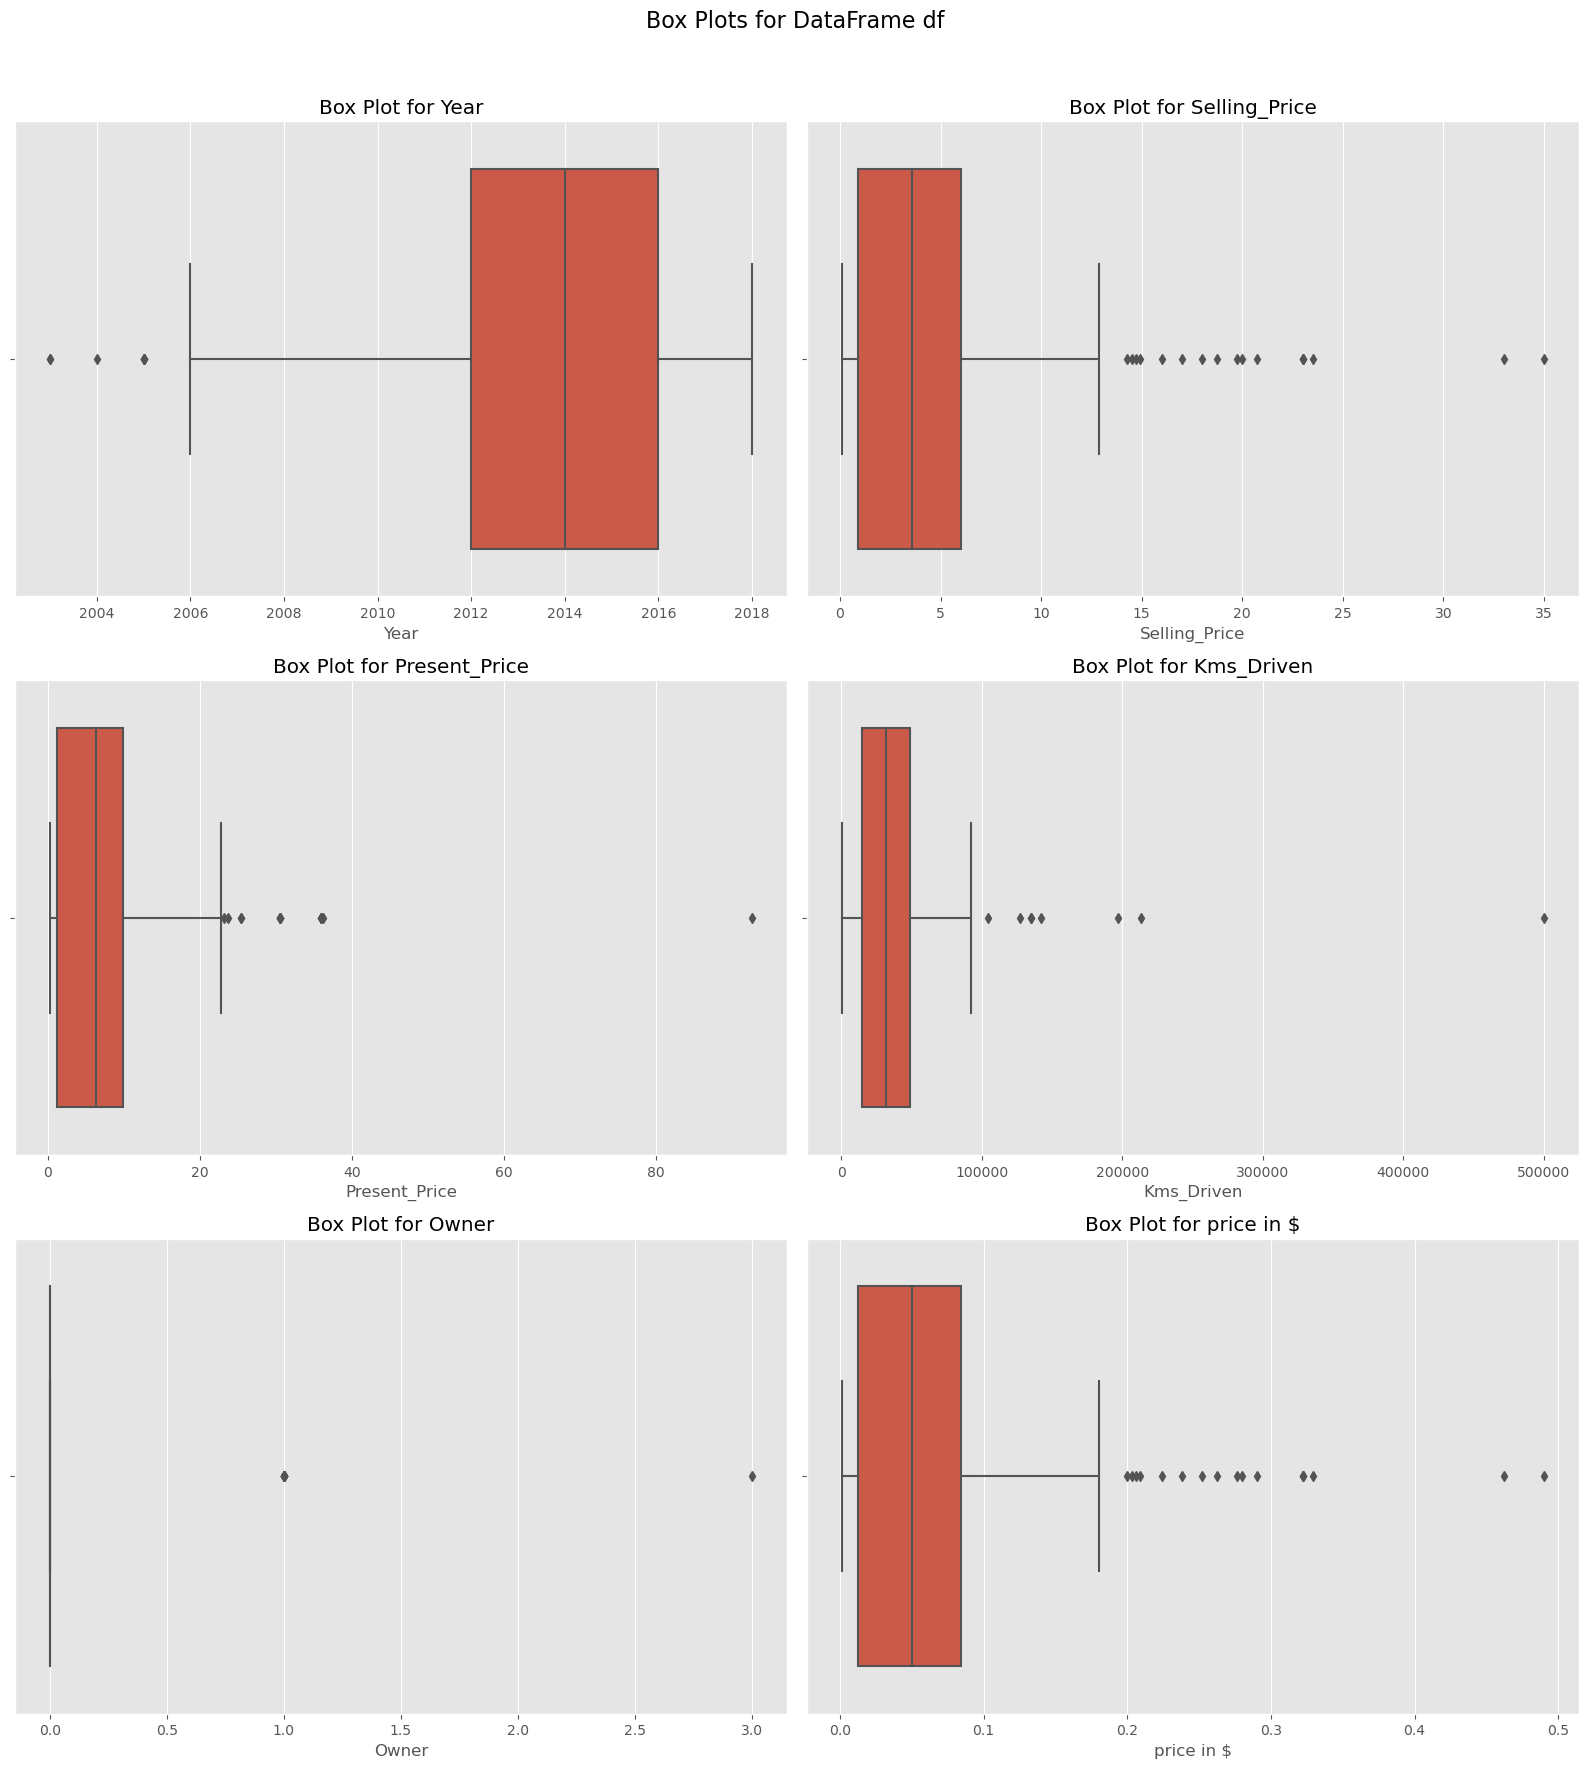

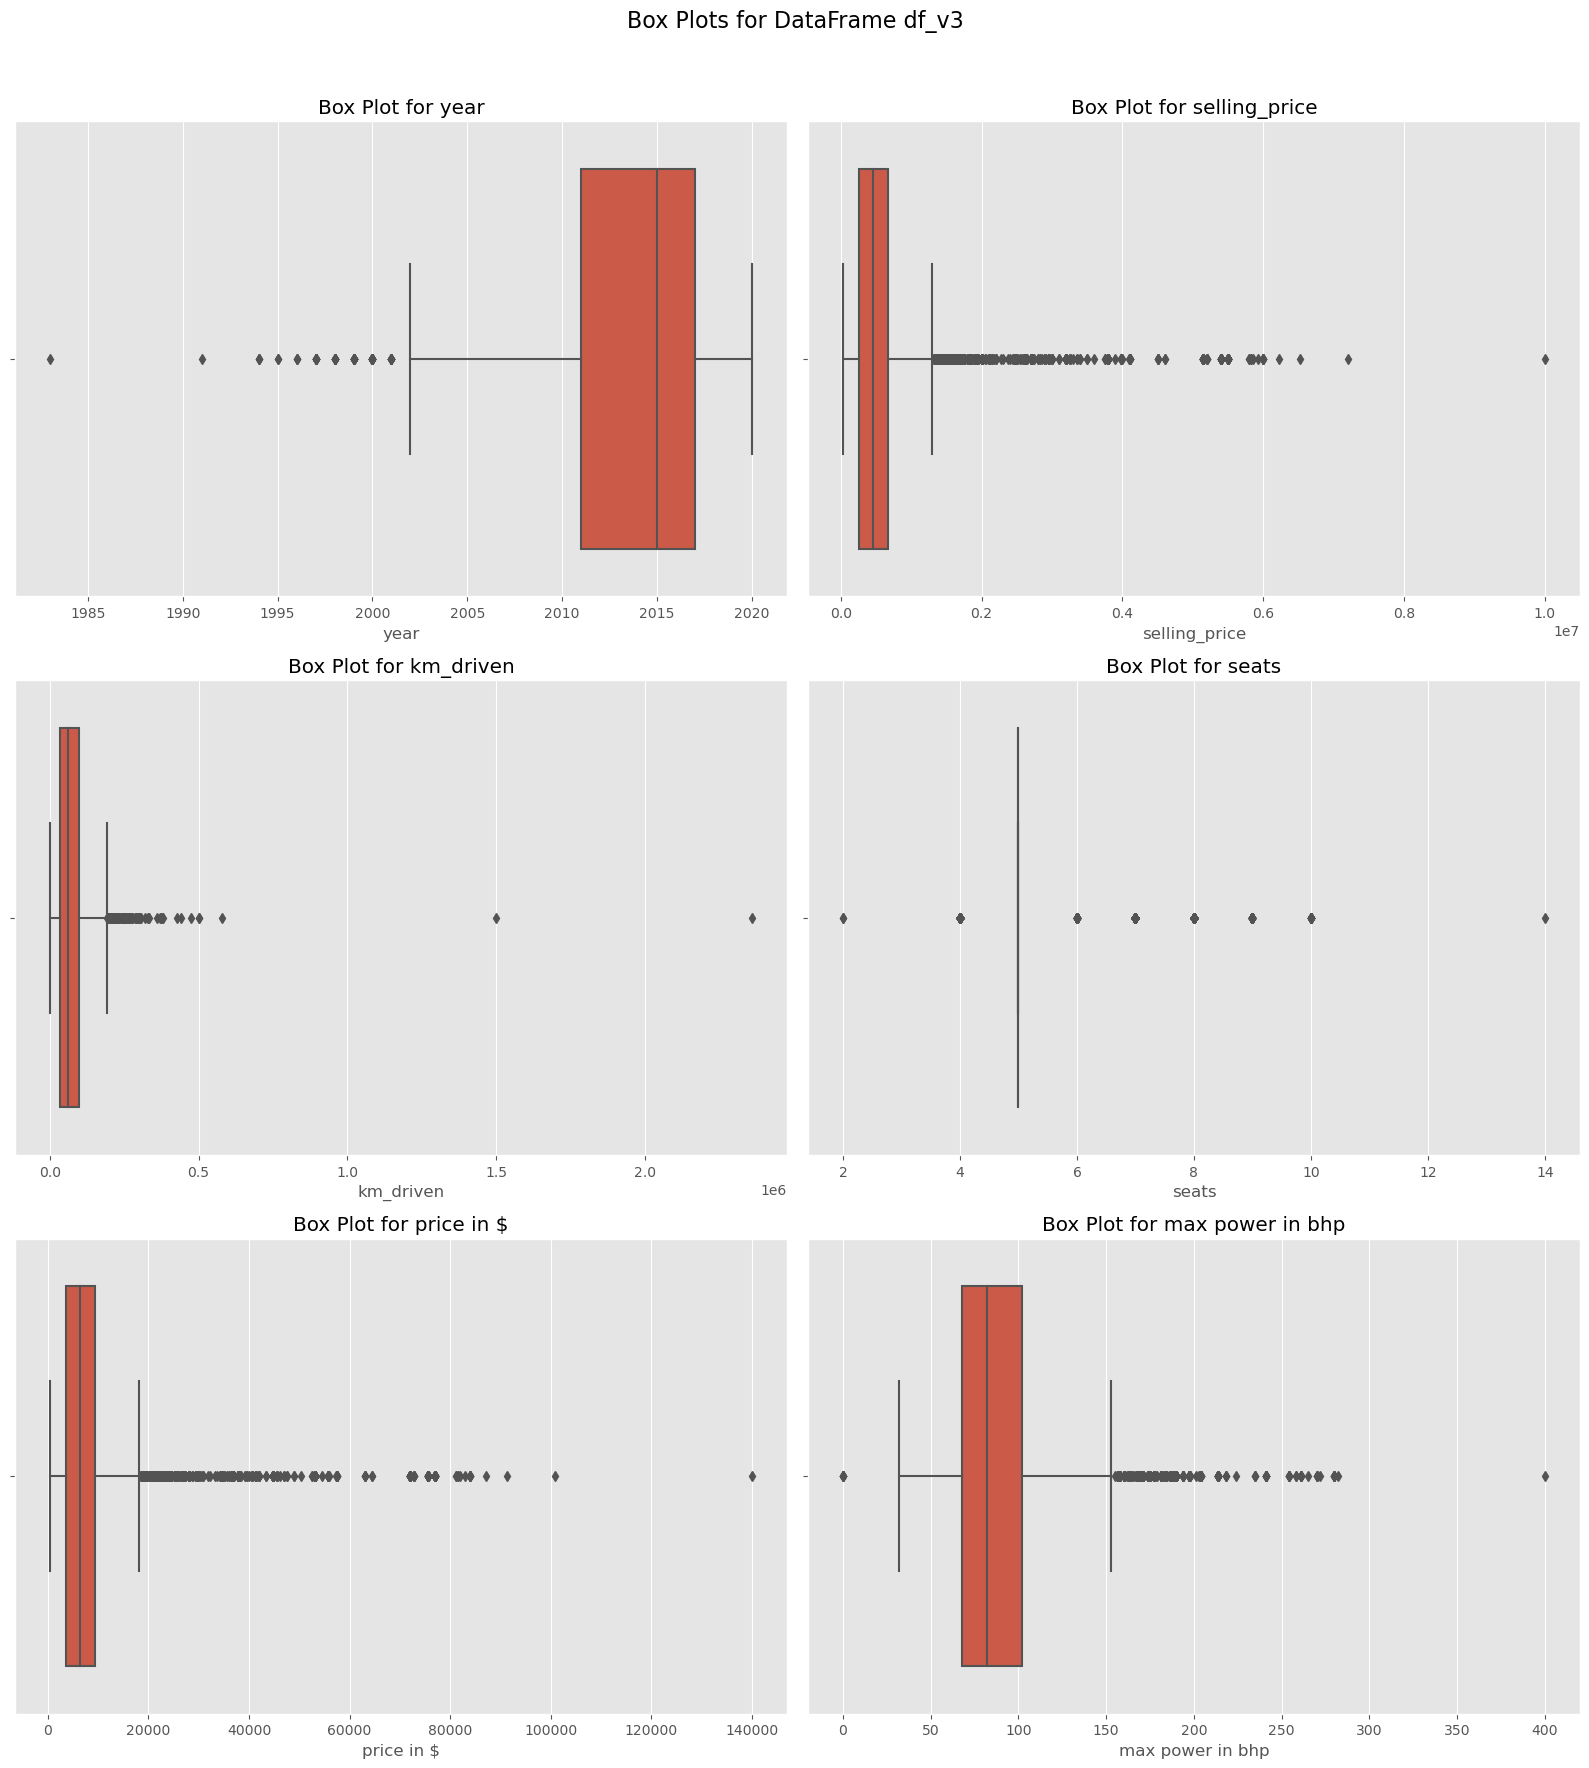

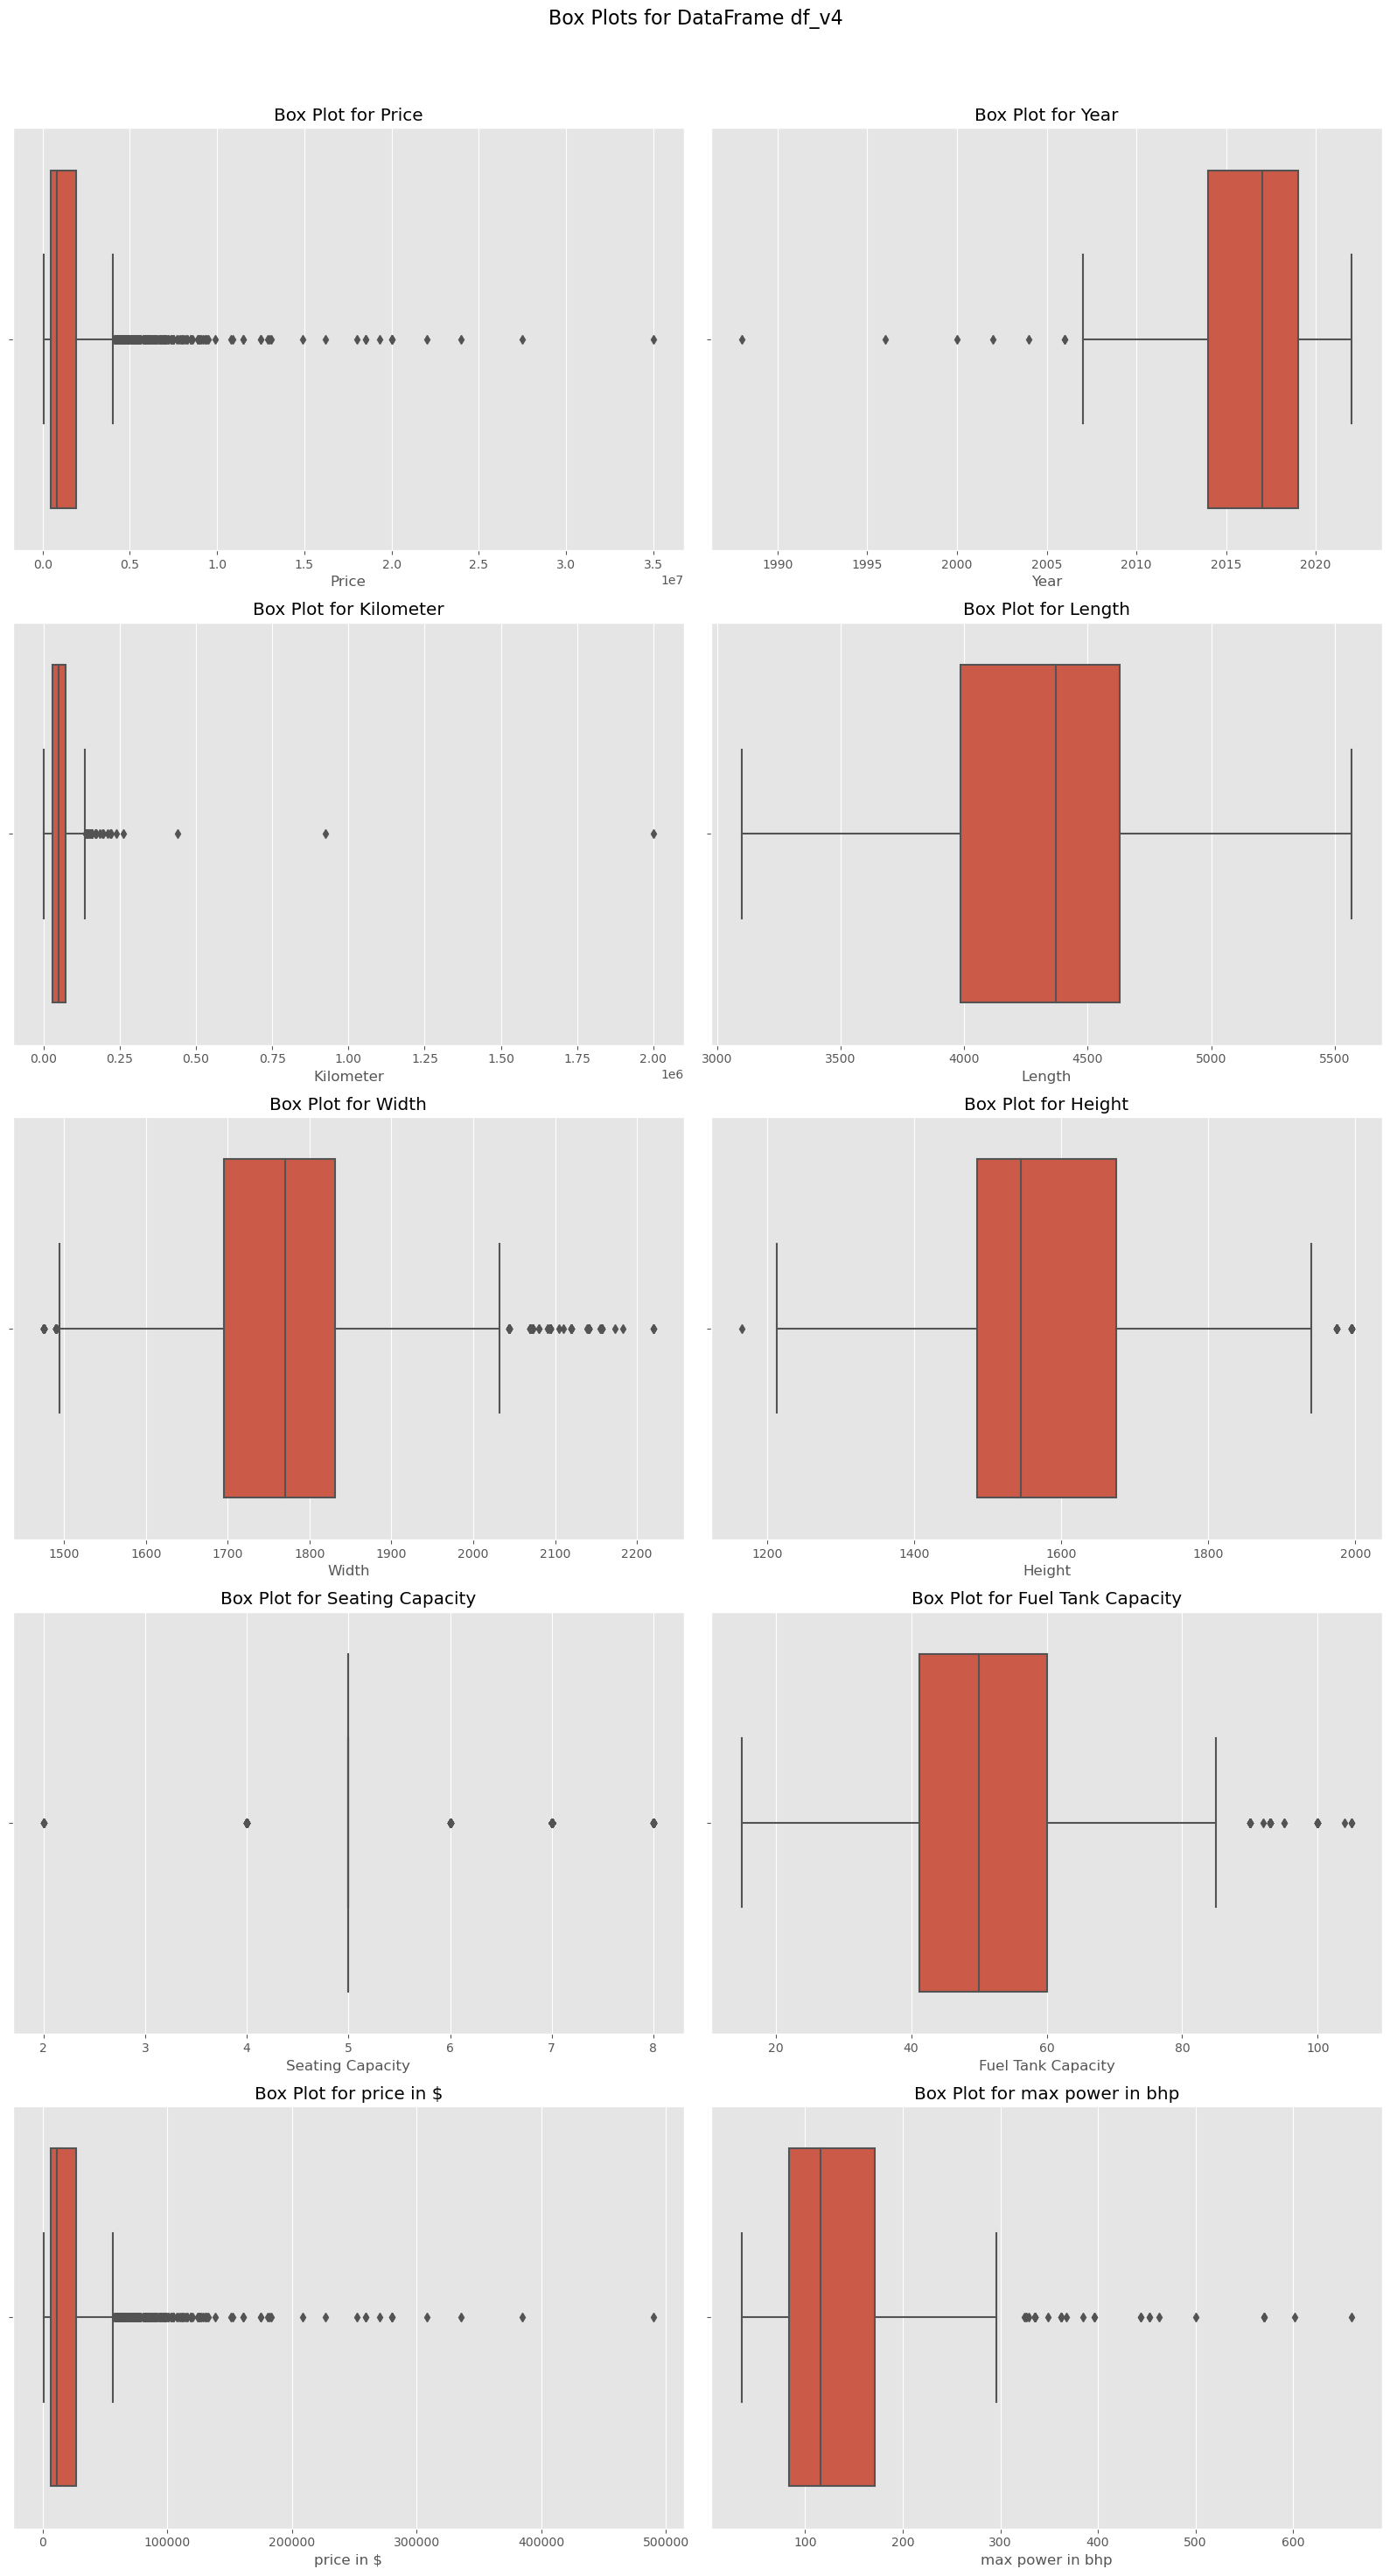

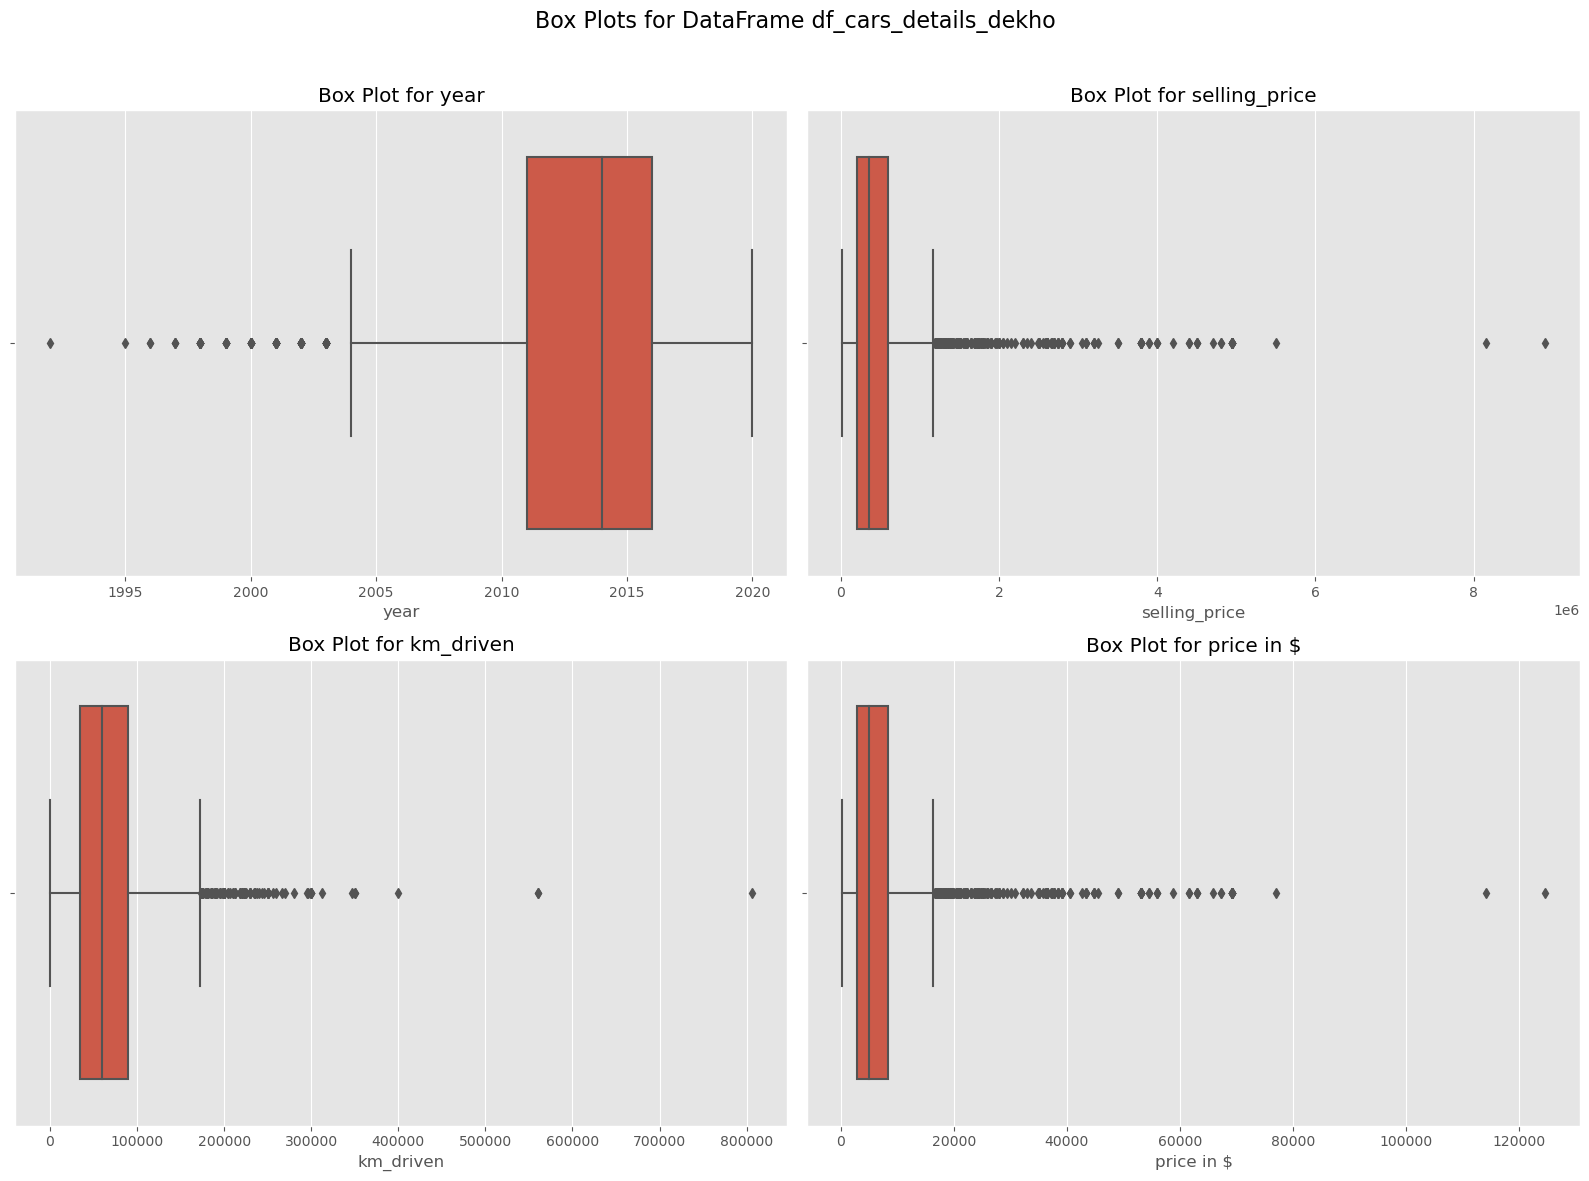

In [291]:


dataframes = [df, df_v3, df_v4, df_cars_details_dekho]
df_names = ["df", "df_v3", "df_v4", "df_cars_details_dekho"]
for i, dataframe in enumerate(dataframes):
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    num_columns = len(numerical_columns)
    
    ncols = 2
    nrows = (num_columns + 1) // ncols
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 6 * nrows))
    fig.suptitle(f'Box Plots for DataFrame {df_names[i]}', fontsize=16)

    for idx, column in enumerate(numerical_columns):
        row = idx // ncols
        col = idx % ncols
        
        sns.boxplot(data=dataframe, x=column, ax=axes[row, col])
        axes[row, col].set_title(f'Box Plot for {column}')
    
    for j in range(idx + 1, nrows * ncols):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [292]:
import numpy as np

def count_outliers(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    outliers_count = {}
    
    for column in numerical_columns:
        q1 = np.percentile(dataframe[column], 25)
        q3 = np.percentile(dataframe[column], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers_count[column] = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    
    return outliers_count

outliers_count_df= count_outliers(df)
outliers_count_df_v3= count_outliers(df_v3)
outliers_count_df_v4= count_outliers(df_v4)
outliers_count_df_cars_details_dekho= count_outliers(df_cars_details_dekho)

print(outliers_count_df)
print("-------------------------------------------------")
print(outliers_count_df_v3)
print("-------------------------------------------------")
print(outliers_count_df_v4)
print("-------------------------------------------------")
print(outliers_count_df_cars_details_dekho)

{'Year': 7, 'Selling_Price': 17, 'Present_Price': 14, 'Kms_Driven': 8, 'Owner': 11, 'price in $': 17}
-------------------------------------------------
{'year': 81, 'selling_price': 600, 'km_driven': 170, 'seats': 0, 'price in $': 600, 'max power in bhp': 0}
-------------------------------------------------
{'Price': 215, 'Year': 7, 'Kilometer': 36, 'Length': 0, 'Width': 0, 'Height': 0, 'Seating Capacity': 0, 'Fuel Tank Capacity': 0, 'price in $': 215, 'max power in bhp': 0}
-------------------------------------------------
{'year': 105, 'selling_price': 271, 'km_driven': 110, 'price in $': 271}


In [293]:
print(df["Car_Name"].value_counts())
print("_________________________________________________________")
print(df_v3["name"].value_counts())
print("_________________________________________________________")
print(df_v4["Make"].value_counts())
print("_________________________________________________________")
print(df_cars_details_dekho["name"].value_counts())


Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
_________________________________________________________
name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1

### **Initial Exploratory data analysis and visualization**

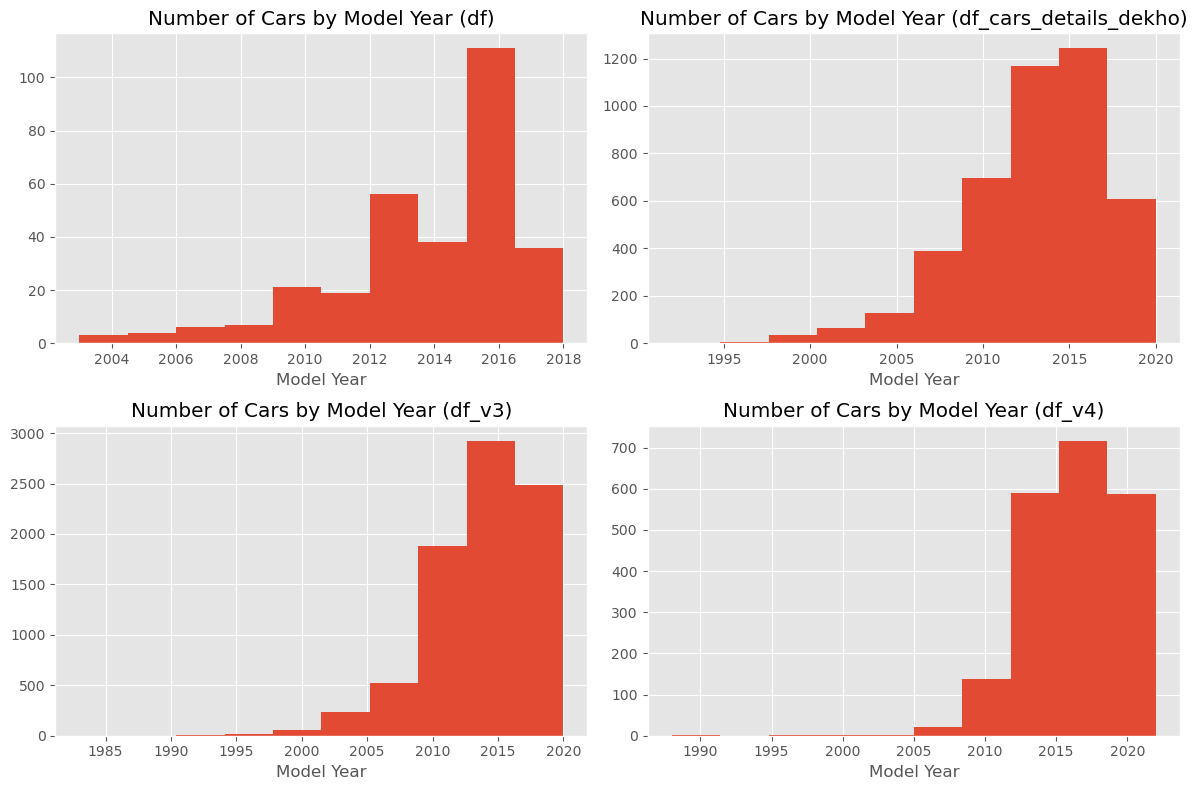

In [294]:
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Year'], bins=10)
axs[0, 0].set_title('Number of Cars by Model Year (df)')
axs[0, 0].set_xlabel('Model Year')

axs[0, 1].hist(df_cars_details_dekho['year'], bins=10)
axs[0, 1].set_title('Number of Cars by Model Year (df_cars_details_dekho)')
axs[0, 1].set_xlabel('Model Year')

axs[1, 0].hist(df_v3['year'], bins=10)
axs[1, 0].set_title('Number of Cars by Model Year (df_v3)')
axs[1, 0].set_xlabel('Model Year')

axs[1, 1].hist(df_v4['Year'], bins=10)
axs[1, 1].set_title('Number of Cars by Model Year (df_v4)')
axs[1, 1].set_xlabel('Model Year')

plt.tight_layout()

plt.show()

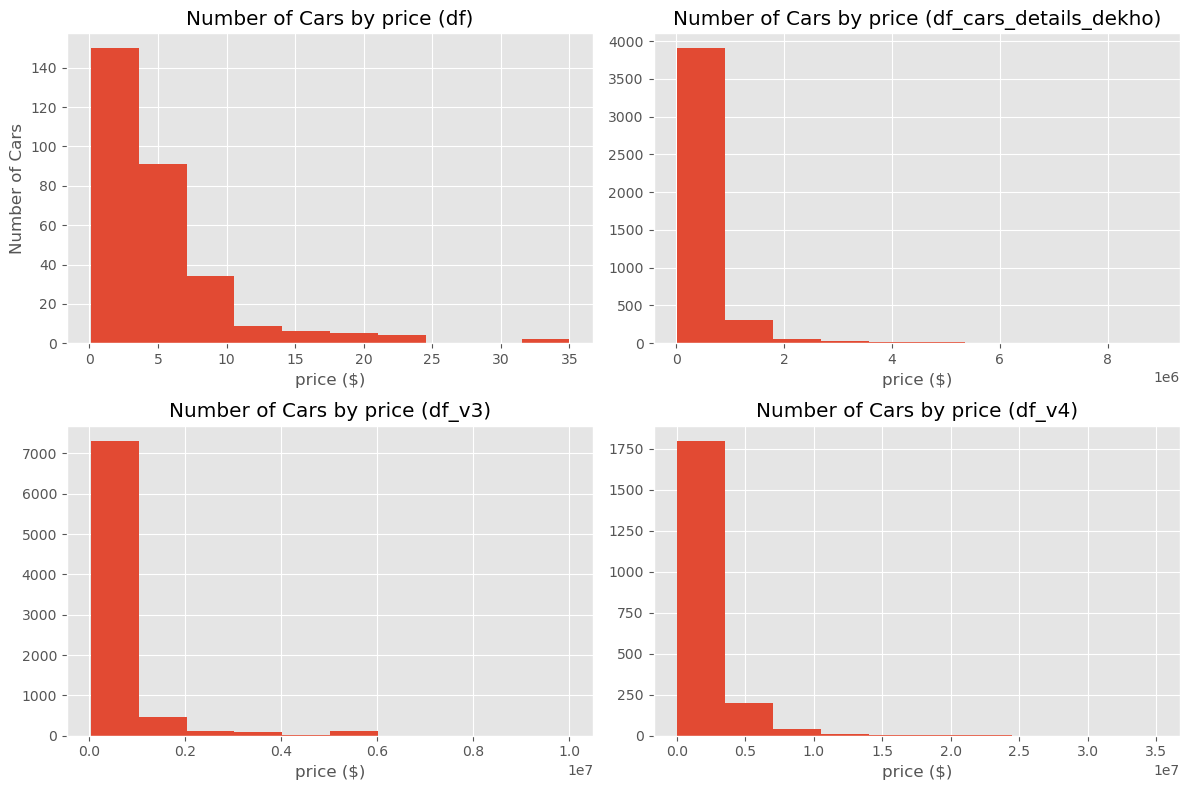

In [295]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Selling_Price'], bins=10)
axs[0, 0].set_title('Number of Cars by price (df)')
axs[0, 0].set_xlabel('price ($)')
axs[0, 0].set_ylabel('Number of Cars')

axs[0, 1].hist(df_cars_details_dekho['selling_price'], bins=10)
axs[0, 1].set_title('Number of Cars by price (df_cars_details_dekho)')
axs[0, 1].set_xlabel('price ($)')

axs[1, 0].hist(df_v3['selling_price'], bins=10)
axs[1, 0].set_title('Number of Cars by price (df_v3)')
axs[1, 0].set_xlabel('price ($)')

axs[1, 1].hist(df_v4['Price'], bins=10)
axs[1, 1].set_title('Number of Cars by price (df_v4)')
axs[1, 1].set_xlabel('price ($)')

plt.tight_layout()

plt.show()

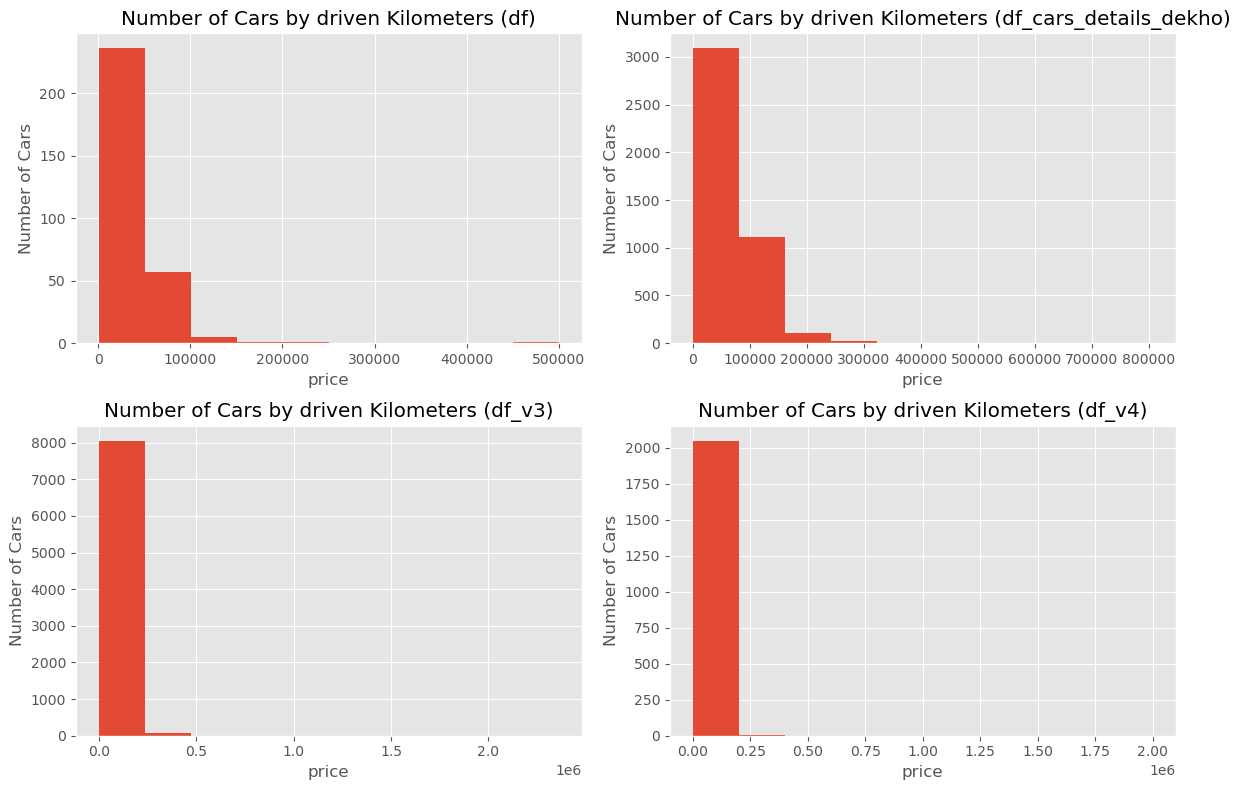

In [296]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(df['Kms_Driven'], bins=10)
axs[0, 0].set_title('Number of Cars by driven Kilometers (df)')
axs[0, 0].set_xlabel('price')
axs[0, 0].set_ylabel('Number of Cars')

axs[0, 1].hist(df_cars_details_dekho['km_driven'], bins=10)
axs[0, 1].set_title('Number of Cars by driven Kilometers (df_cars_details_dekho)')
axs[0, 1].set_xlabel('price')
axs[0, 1].set_ylabel('Number of Cars')

axs[1, 0].hist(df_v3['km_driven'], bins=10)
axs[1, 0].set_title('Number of Cars by driven Kilometers (df_v3)')
axs[1, 0].set_xlabel('price')
axs[1, 0].set_ylabel('Number of Cars')

axs[1, 1].hist(df_v4['Kilometer'], bins=10)
axs[1, 1].set_title('Number of Cars by driven Kilometers (df_v4)')
axs[1, 1].set_xlabel('price')
axs[1, 1].set_ylabel('Number of Cars')

plt.tight_layout()

plt.show()

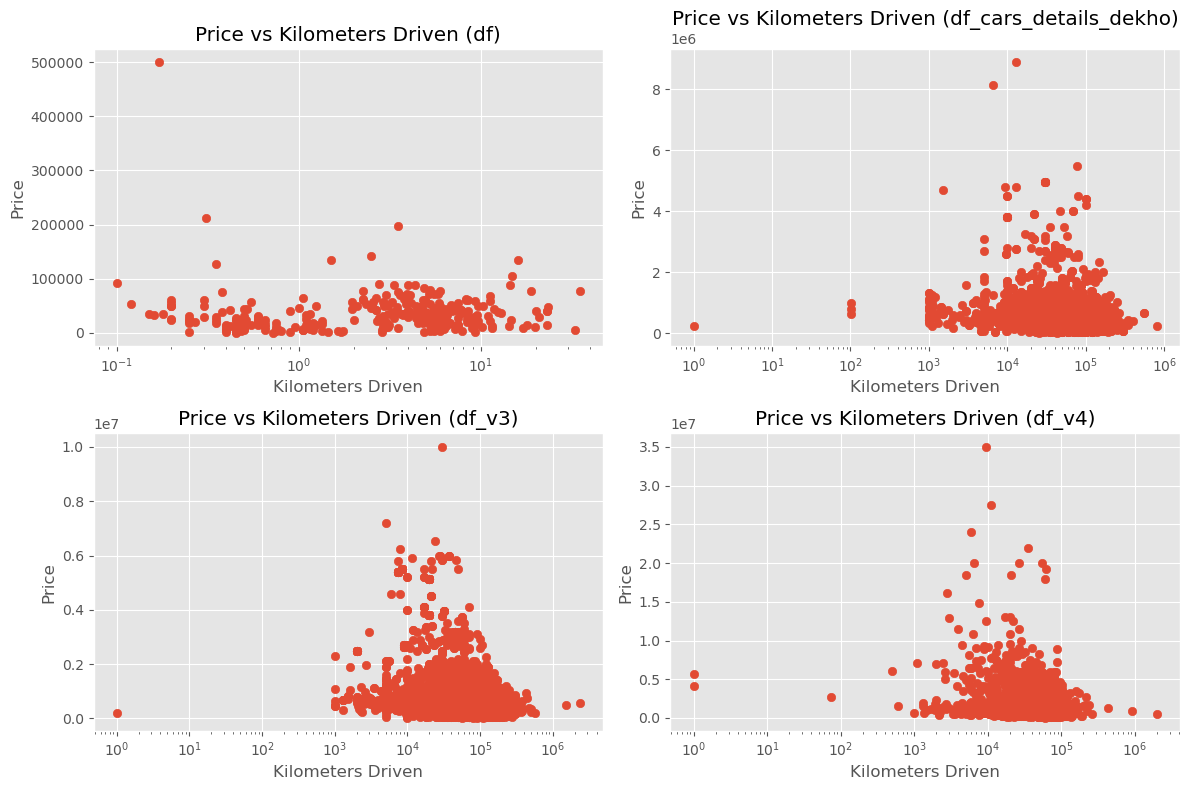

In [297]:

plt.style.use('ggplot')
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(df['Selling_Price'], df['Kms_Driven'])
axs[0,0].set_title('Price vs Kilometers Driven (df)')
axs[0,0].set_xlabel('Kilometers Driven')
axs[0,0].set_ylabel('Price')
axs[0,0].set_xscale('log')


axs[0, 1].scatter(df_cars_details_dekho['km_driven'], df_cars_details_dekho['selling_price'])
axs[0, 1].set_title('Price vs Kilometers Driven (df_cars_details_dekho)')
axs[0, 1].set_xlabel('Kilometers Driven')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_xscale('log')

axs[1, 0].scatter(df_v3['km_driven'], df_v3['selling_price'])
axs[1, 0].set_title('Price vs Kilometers Driven (df_v3)')
axs[1, 0].set_xlabel('Kilometers Driven')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_xscale('log')

axs[1, 1].scatter(df_v4['Kilometer'], df_v4['Price'])
axs[1,1].set_title('Price vs Kilometers Driven (df_v4)')
axs[1,1].set_xlabel('Kilometers Driven')
axs[1,1].set_ylabel('Price')
axs[1, 1].set_ylabel('Price')
axs[1, 1].set_xscale('log')

plt.tight_layout()

plt.show()

In [298]:
print(df['Fuel_Type'].value_counts())
print("_________________________________________________________")
print(df_v3['fuel'].value_counts())
print("_________________________________________________________")
print(df_v4['Fuel Type'].value_counts())
print("_________________________________________________________")
print(df_cars_details_dekho['fuel'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
_________________________________________________________
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
_________________________________________________________
Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64
_________________________________________________________
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


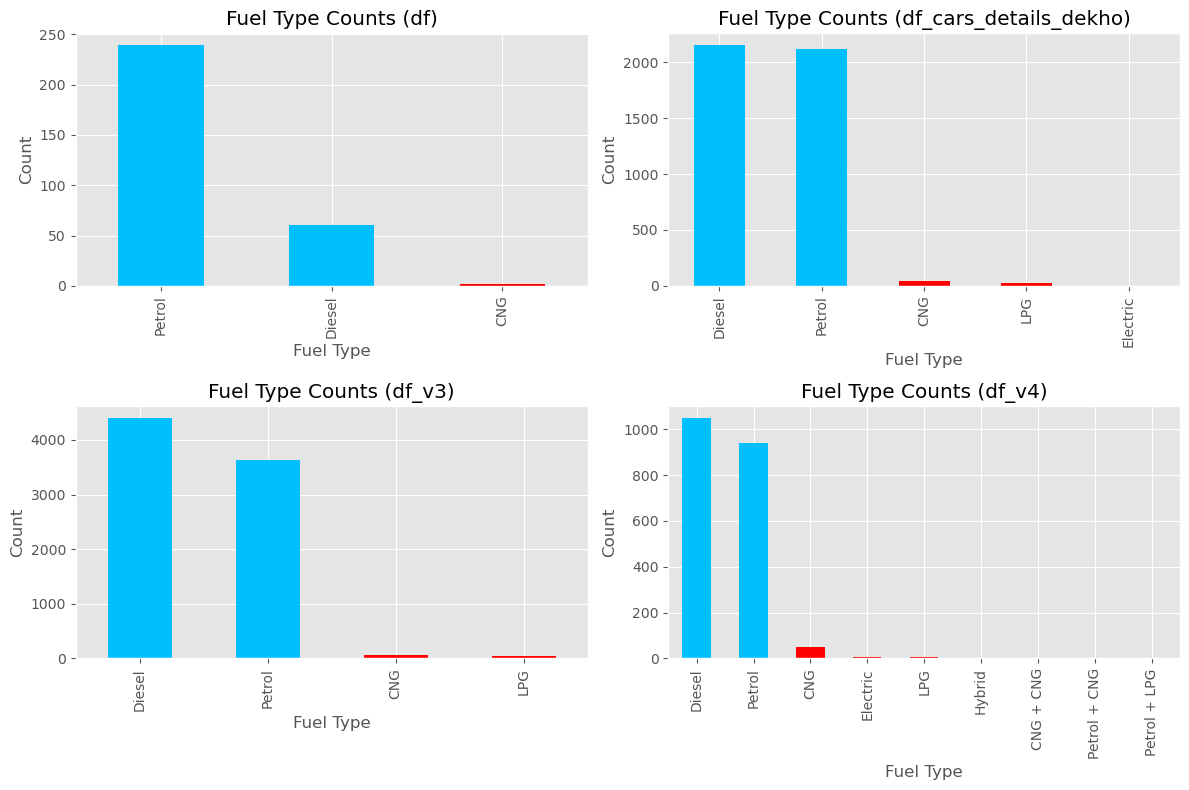

In [299]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)

categories= df_v4['Fuel Type'].unique()
blue_categories = ['Diesel','Petrol']
colors = ['deepskyblue' if x in blue_categories else 'red' for x in categories]

df['Fuel_Type'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
df_cars_details_dekho['fuel'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_cars_details_dekho)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
df_v3['fuel'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_v3)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df_v4['Fuel Type'].value_counts().plot(kind='bar',color = colors)
plt.title('Fuel Type Counts (df_v4)')
plt.xlabel('Fuel Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [300]:
print(df['Transmission'].value_counts())
print("________________________________________________________")
print(df_v3['transmission'].value_counts())
print("________________________________________________________")
print(df_v4['Transmission'].value_counts())
print("________________________________________________________")
print(df_cars_details_dekho['transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
________________________________________________________
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
________________________________________________________
Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64
________________________________________________________
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


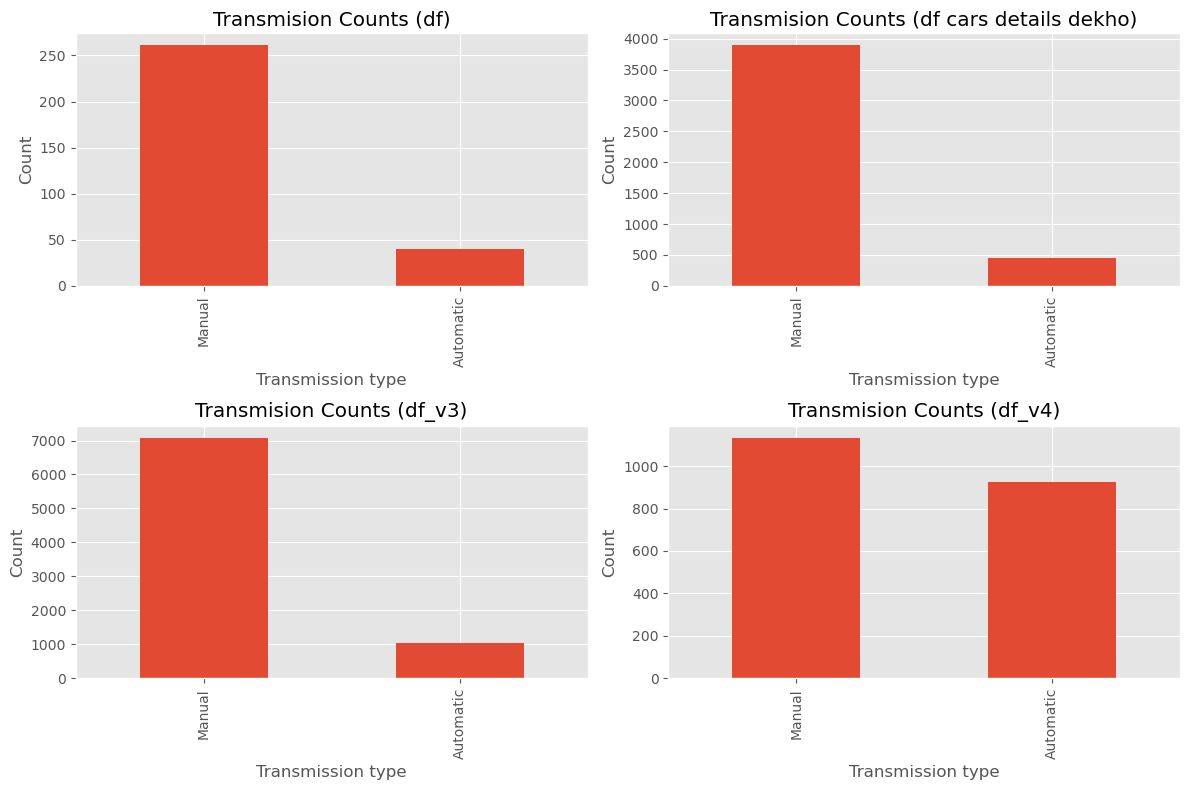

In [301]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)


df['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.subplot(2, 2, 2)
df_cars_details_dekho['transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df cars details dekho)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.subplot(2, 2, 3)
df_v3['transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df_v3)')
plt.xlabel('Transmission type')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
df_v4['Transmission'].value_counts().plot(kind='bar')
plt.title('Transmision Counts (df_v4)')
plt.xlabel('Transmission type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### V3 AND V4 SPECIFIC COMPARISON 

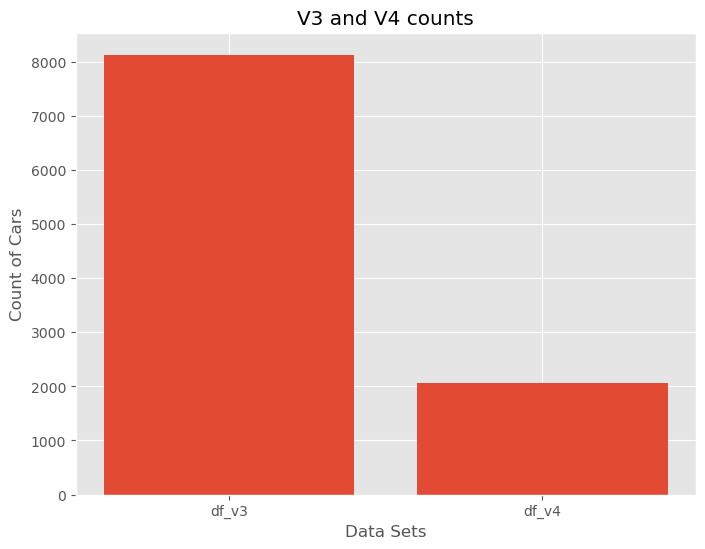

In [302]:
plt.figure(figsize=(8, 6))
datasets = ['df_v3', 'df_v4']
counts = [df_v3.shape[0], df_v4.shape[0]]
plt.bar(datasets, counts)
plt.title('V3 and V4 counts')
plt.xlabel('Data Sets')
plt.ylabel('Count of Cars')
plt.show()

In [303]:
print("v4 Motors: {}".format(list(df_v4["Engine"].unique())))


v4 Motors: ['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc', '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc', '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc', nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc', '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc', '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc', '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc', '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc', '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc', '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc', '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc', '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc', '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc', '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '2953 cc', '1496 cc', '1499 cc', '1996 cc', '5461 cc', '1395 cc', '2835 cc', '2148 cc',

In [304]:
print("v3 Motors: {}".format(list(df_v3["engine"].unique())))


v3 Motors: ['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC', '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC', '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC', '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC', '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC', '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC', '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC', '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1527 CC', '2199 CC', '995 CC', '2993 CC', '1586 CC', '1390 CC', '909 CC', '2393 CC', '319

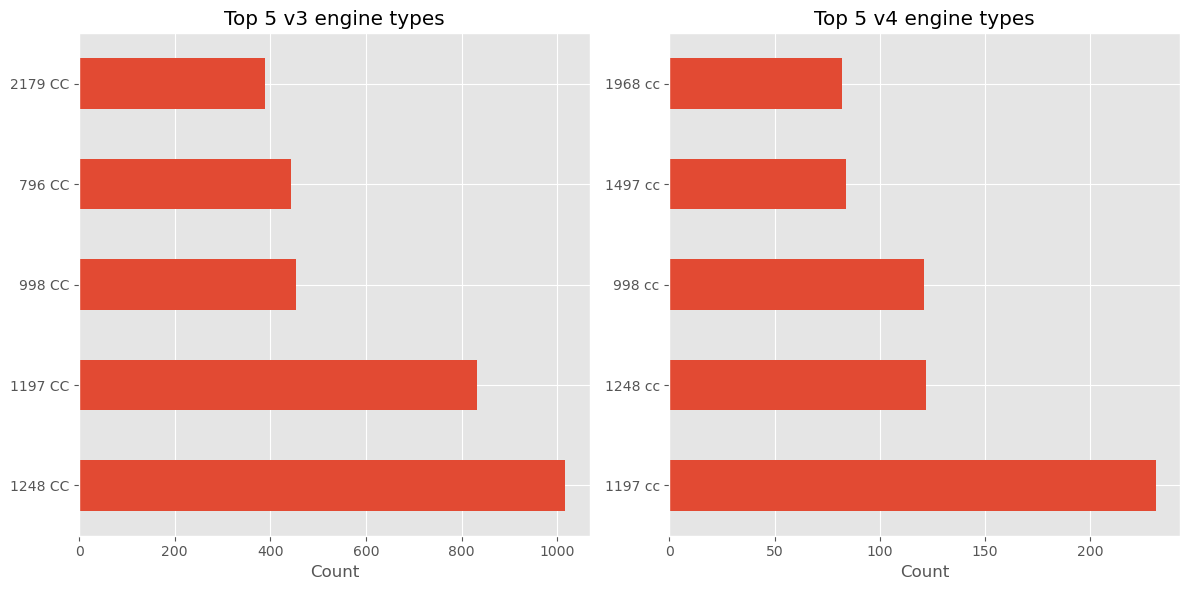

In [305]:
def getmaxfive(data):
    return data.value_counts().head(5)

top_5_v3_engines = getmaxfive(df_v3["engine"])
top_5_v4_engines = getmaxfive(df_v4["Engine"])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_5_v3_engines.plot(kind='barh')
plt.title('Top 5 v3 engine types')
plt.xlabel('Count')
plt.ylabel(None)

plt.subplot(1, 2, 2)
top_5_v4_engines.plot(kind='barh')
plt.title('Top 5 v4 engine types')
plt.xlabel('Count')
plt.ylabel(None)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

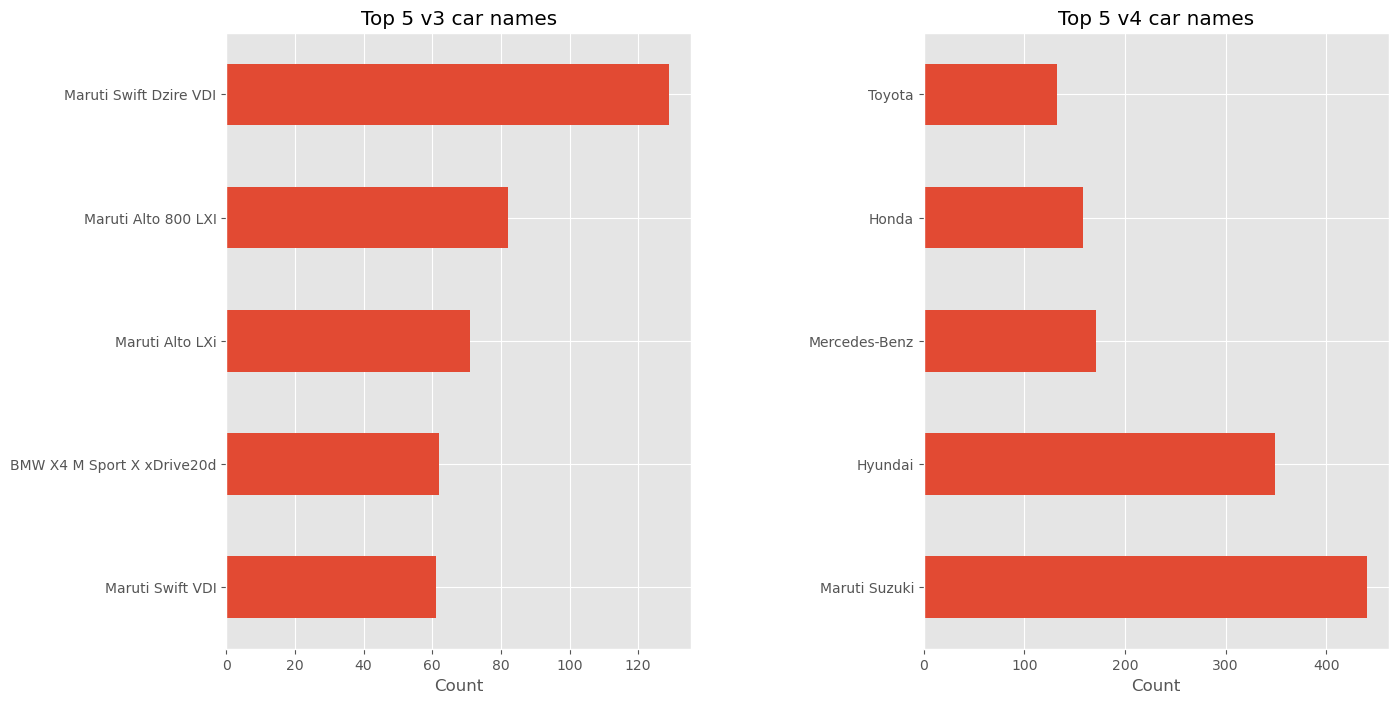

In [306]:
top_v3_carnames = getmaxfive(df_v3["name"])
top_v4_carnames = getmaxfive(df_v4["Make"])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
top_v3_carnames.plot(kind='barh')
plt.title('Top 5 v3 car names')
plt.xlabel('Count')
plt.ylabel(None)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_v4_carnames.plot(kind='barh')
plt.title('Top 5 v4 car names')
plt.xlabel('Count')
plt.ylabel(None)
plt.subplots_adjust(wspace=0.5)


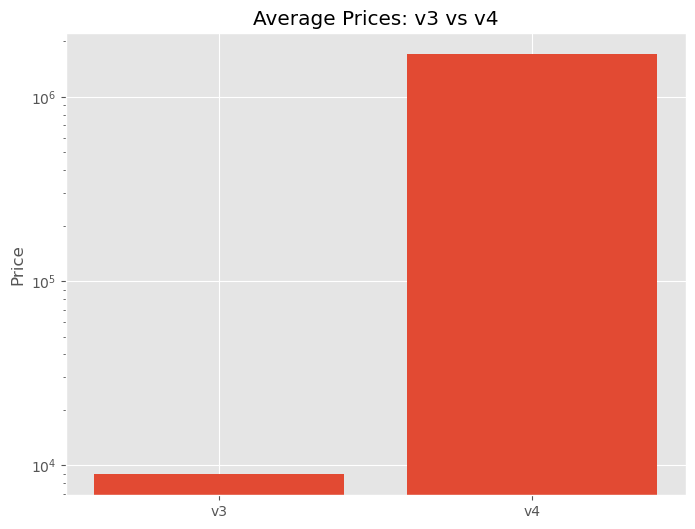

In [307]:
plt.figure(figsize=(8, 6))
prices = [df_v3['price in $'].mean(), df_v4['Price'].mean()]
labels = ['v3', 'v4']
plt.bar(labels, prices)
plt.title('Average Prices: v3 vs v4')
plt.yscale('log')
plt.xlabel(None)
plt.ylabel('Price')
plt.show()

In [308]:
max_price_v3 = df_v3['price in $'].max()
max_price_v4 = df_v4['price in $'].max()
print("Max price v3: {}".format(max_price_v3))
print("Max price v4: {}".format(max_price_v4))

Max price v3: 140000.0
Max price v4: 490000.0


In [309]:
min_price_v3 = df_v3['price in $'].min()
min_price_v4 = df_v4['price in $'].min()
print("Min price v3: {}".format(min_price_v3))
print("Min price v4: {}".format(min_price_v4))


Min price v3: 419.986
Min price v4: 686.0


In [310]:
max_power_v3 = df_v3['max_power']
max_power_v4 = df_v4['Max Power']
print("Max power v3: {}".format(max_power_v3))
print("_________________________________________________________")
print("Max power v4: {}".format(max_power_v4))

Max power v3: 0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
8123     82.85 bhp
8124       110 bhp
8125      73.9 bhp
8126        70 bhp
8127        70 bhp
Name: max_power, Length: 8128, dtype: object
_________________________________________________________
Max power v4: 0        87 bhp @ 6000 rpm
1        74 bhp @ 4000 rpm
2        79 bhp @ 6000 rpm
3        82 bhp @ 6000 rpm
4       148 bhp @ 3400 rpm
               ...        
2054    138 bhp @ 3750 rpm
2055     55 bhp @ 5500 rpm
2056     70 bhp @ 6250 rpm
2057    188 bhp @ 4000 rpm
2058     70 bhp @ 3600 rpm
Name: Max Power, Length: 2059, dtype: object


In [311]:
v3_seats = df_v3['seats'].value_counts()
v4_seats = df_v4['Seating Capacity'].value_counts()

print("v3 seats: {}".format(v3_seats))
print("_________________________________________________________")
print("v4 seats: {}".format(v4_seats))


v3 seats: seats
5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64
_________________________________________________________
v4 seats: Seating Capacity
5.0    1615
7.0     273
4.0      42
8.0      35
6.0      23
2.0       7
Name: count, dtype: int64


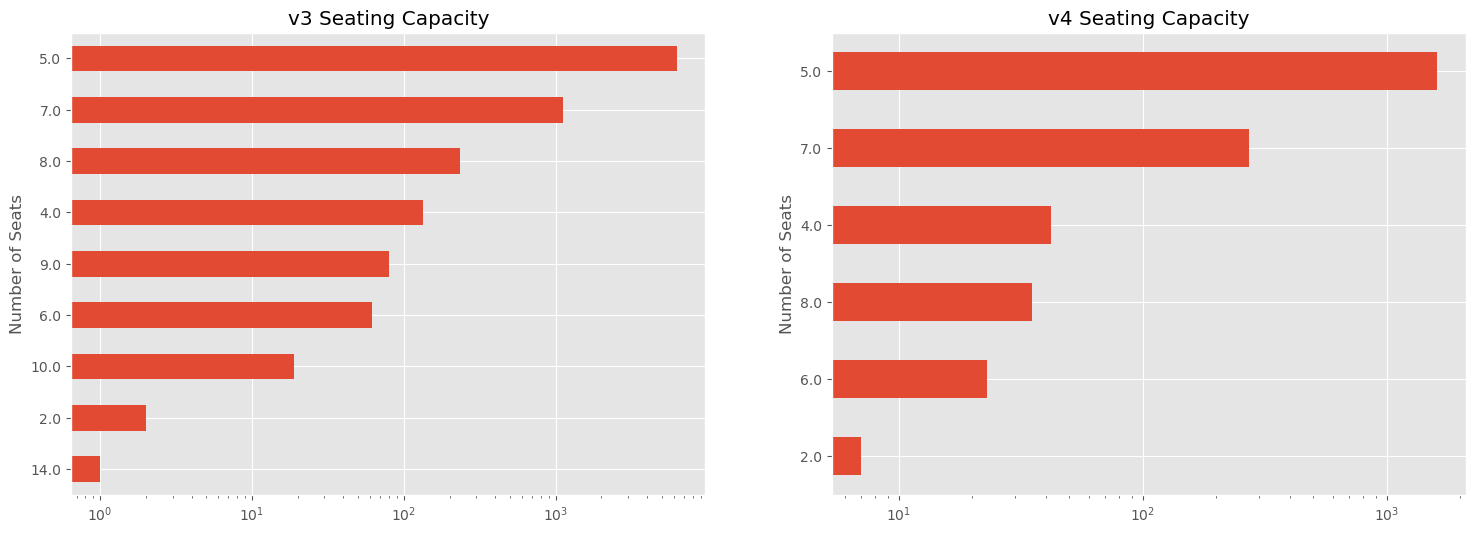

In [312]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
v3_seats.plot(kind='barh')
plt.title('v3 Seating Capacity')
plt.xlabel(None)
plt.ylabel("Number of Seats")
plt.xscale('log')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
v4_seats.plot(kind='barh')
plt.title('v4 Seating Capacity')
plt.xlabel(None)
plt.xscale('log')
plt.ylabel('Number of Seats')
plt.gca().invert_yaxis()  

plt.show()

In [313]:
car_price_comparison_v3 = df_v3.groupby("name")["price in $"].mean().sort_values(ascending=False)
car_price_comparison_v4 = df_v4.groupby("Make")["price in $"].mean().sort_values(ascending=False)

In [314]:
top_5_highrprice_v3 = car_price_comparison_v3.head(5)
top_5_highrprice_v4 = car_price_comparison_v4.head(5)


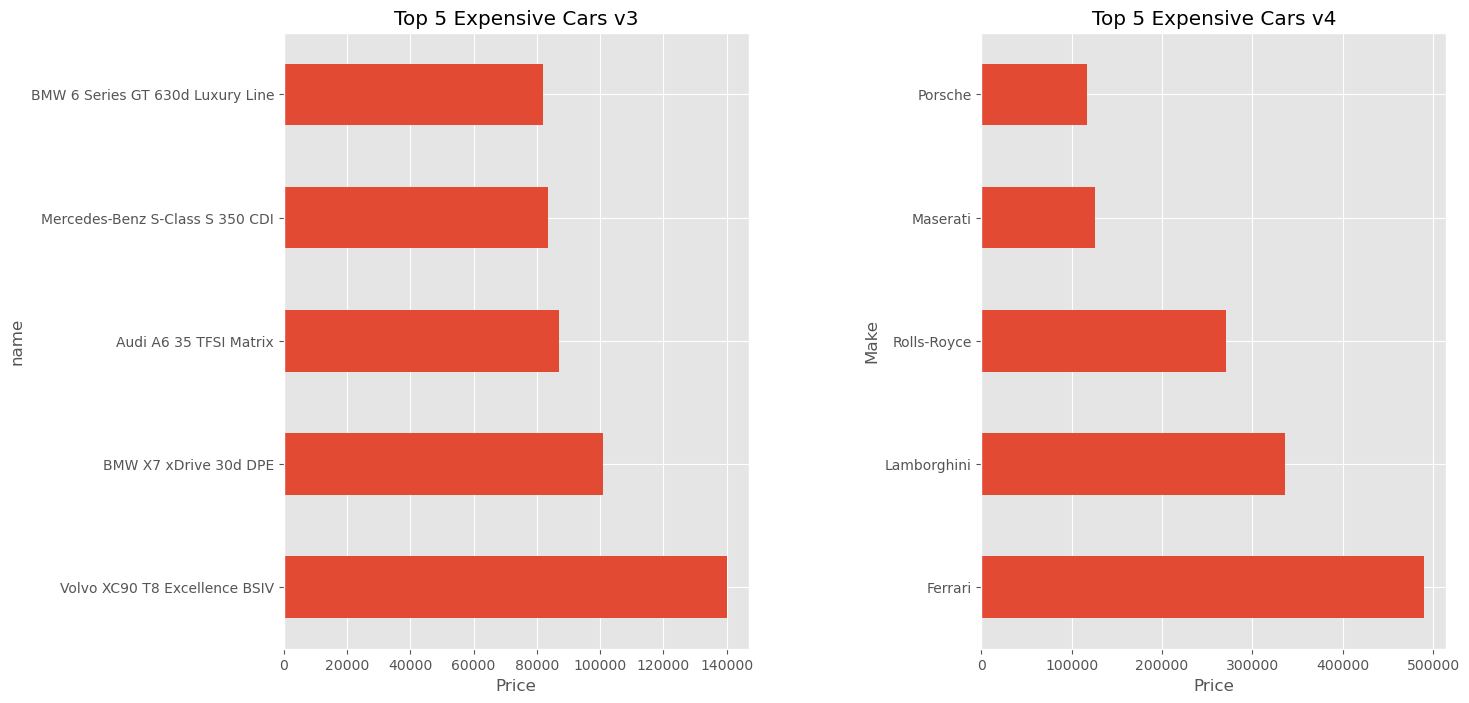

In [315]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
top_5_highrprice_v3.plot(kind='barh')
plt.title('Top 5 Expensive Cars v3')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
top_5_highrprice_v4.plot(kind='barh')
plt.title('Top 5 Expensive Cars v4')
plt.xlabel('Price')
plt.subplots_adjust(wspace=0.5)

plt.show()


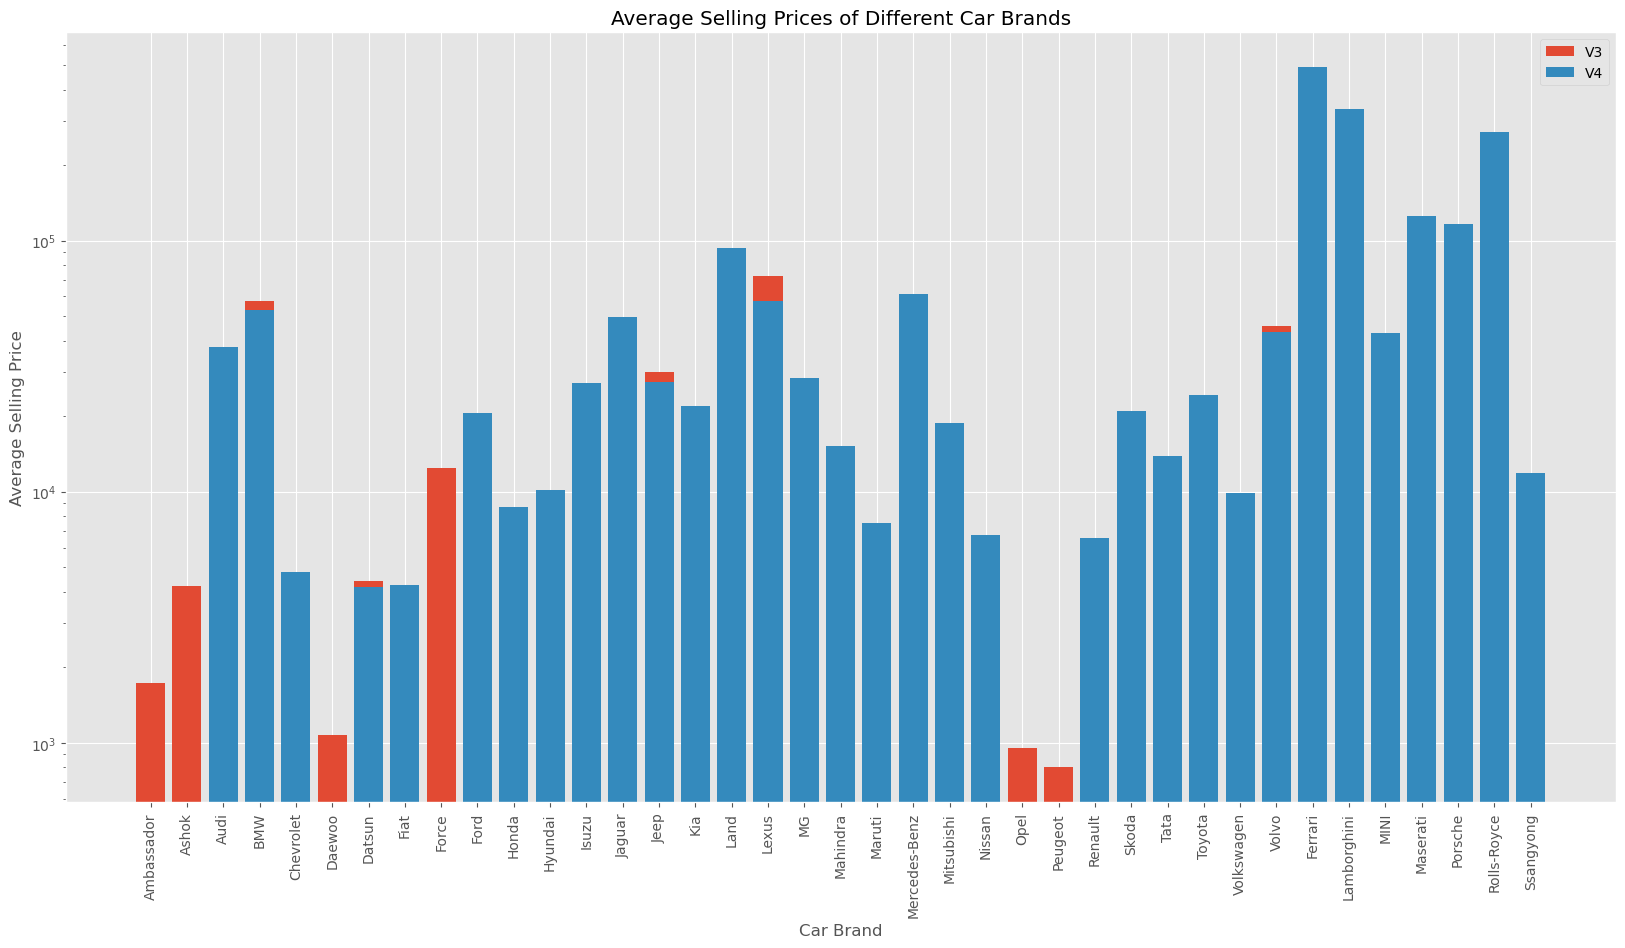

In [316]:
df_v3['Brand'] = df_v3['name'].str.split(' ', expand=True)[0]
df_v3_avg_price = df_v3.groupby('Brand')['price in $'].mean()

df_v4['Brand'] = df_v4['Make'].str.split(' ', expand=True)[0]
df_v4_avg_price = df_v4.groupby('Brand')['price in $'].mean()

plt.figure(figsize=(20, 10))
plt.bar(df_v3_avg_price.index, df_v3_avg_price, label='V3')
plt.bar(df_v4_avg_price.index, df_v4_avg_price, label='V4')
plt.xlabel('Car Brand')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Prices of Different Car Brands')
plt.yscale('log') 
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [317]:
print(df_v4['Max Power'])
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print(df_v4['max power in bhp'])
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print(df_v3['max_power'])
print("***********************************************************************************************************")
print("***********************************************************************************************************")
print(df_v3['max power in bhp'])

0        87 bhp @ 6000 rpm
1        74 bhp @ 4000 rpm
2        79 bhp @ 6000 rpm
3        82 bhp @ 6000 rpm
4       148 bhp @ 3400 rpm
               ...        
2054    138 bhp @ 3750 rpm
2055     55 bhp @ 5500 rpm
2056     70 bhp @ 6250 rpm
2057    188 bhp @ 4000 rpm
2058     70 bhp @ 3600 rpm
Name: Max Power, Length: 2059, dtype: object
***********************************************************************************************************
***********************************************************************************************************
0        87.0
1        74.0
2        79.0
3        82.0
4       148.0
        ...  
2054    138.0
2055     55.0
2056     70.0
2057    188.0
2058     70.0
Name: max power in bhp, Length: 2059, dtype: float64
***********************************************************************************************************
***********************************************************************************************************
*******************

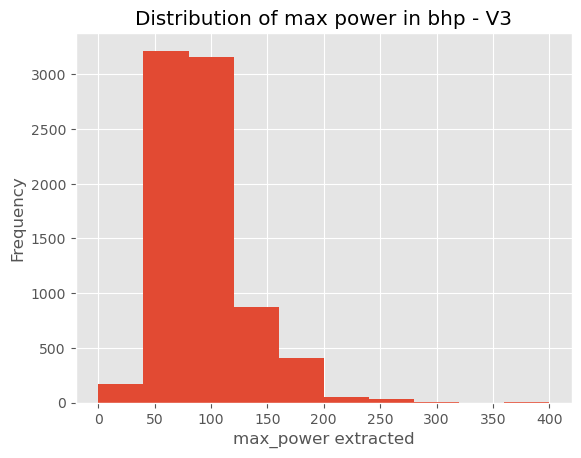

Mean: 91.20
Median: 82.00
Minimum: 0.00
Maximum: 400.00


In [318]:
import matplotlib.pyplot as plt

# Plot histogram of max_power extracted
plt.hist(df_v3['max power in bhp'], bins=10)
plt.title('Distribution of max power in bhp - V3')
plt.xlabel('max_power extracted')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics
max_power_extracted_mean = df_v3['max power in bhp'].mean()
max_power_extracted_median = df_v3['max power in bhp'].median()
max_power_extracted_min = df_v3['max power in bhp'].min()
max_power_extracted_max = df_v3['max power in bhp'].max()

print("Mean: {:.2f}".format(max_power_extracted_mean))
print("Median: {:.2f}".format(max_power_extracted_median))
print("Minimum: {:.2f}".format(max_power_extracted_min))
print("Maximum: {:.2f}".format(max_power_extracted_max))

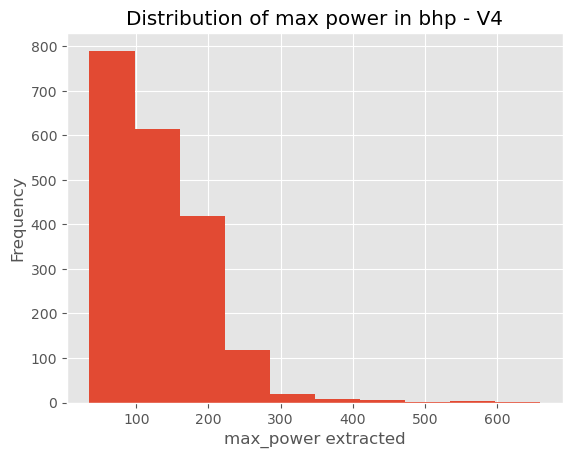

Mean: 129.61
Median: 116.00
Minimum: 35.00
Maximum: 660.00


In [319]:
import matplotlib.pyplot as plt

# Plot histogram of max_power extracted
plt.hist(df_v4['max power in bhp'], bins=10)
plt.title('Distribution of max power in bhp - V4')
plt.xlabel('max_power extracted')
plt.ylabel('Frequency')
plt.show()

# Calculate summary statistics
max_power_extracted_mean = df_v4['max power in bhp'].mean()
max_power_extracted_median = df_v4['max power in bhp'].median()
max_power_extracted_min = df_v4['max power in bhp'].min()
max_power_extracted_max = df_v4['max power in bhp'].max()

print("Mean: {:.2f}".format(max_power_extracted_mean))
print("Median: {:.2f}".format(max_power_extracted_median))
print("Minimum: {:.2f}".format(max_power_extracted_min))
print("Maximum: {:.2f}".format(max_power_extracted_max))

Text(0, 0.5, 'Price')

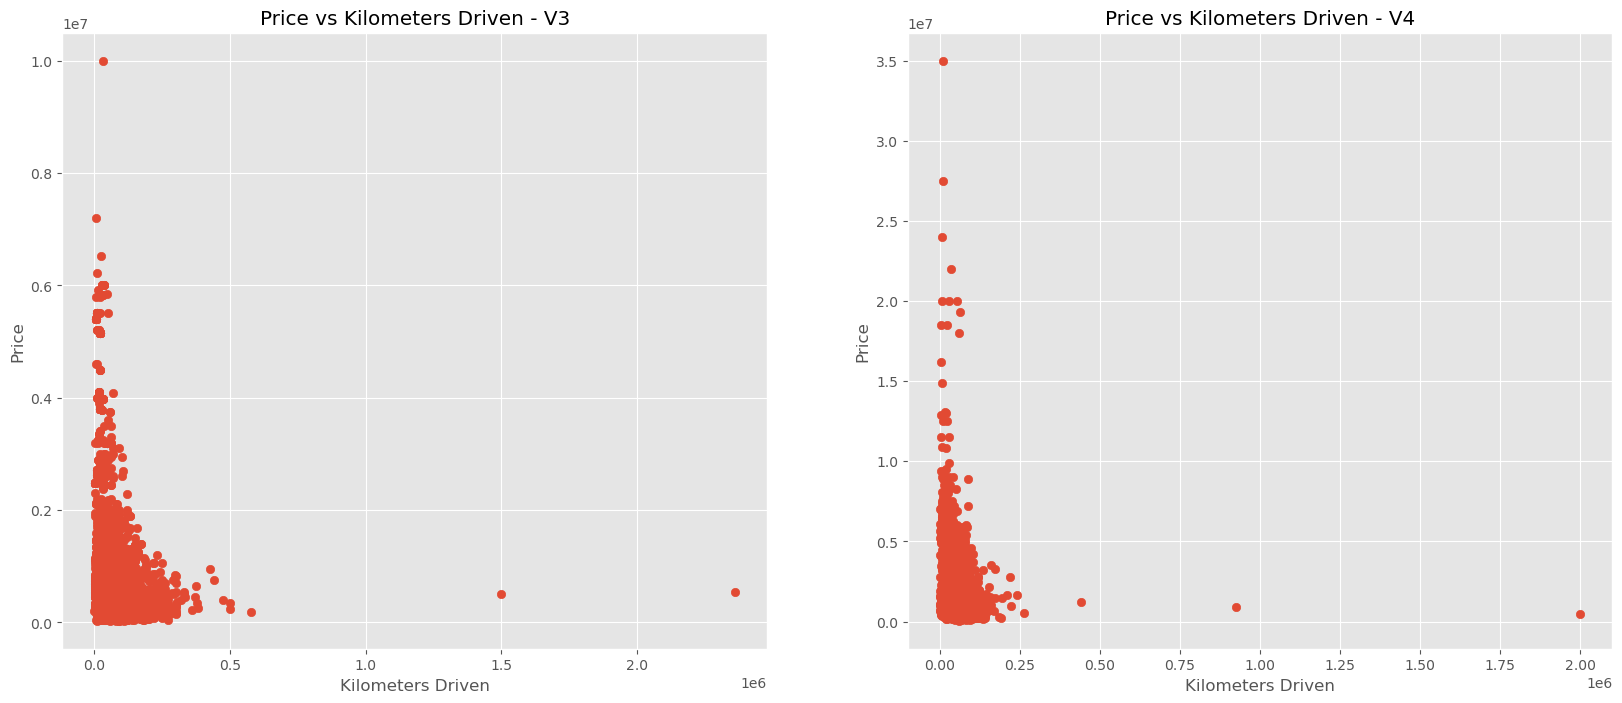

In [320]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(df_v3['km_driven'], df_v3['selling_price'])
plt.title('Price vs Kilometers Driven - V3')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_v4['Kilometer'], df_v4['Price'])
plt.title('Price vs Kilometers Driven - V4')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')



In [321]:
print(df_v3.columns)
print(df_v4.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'price in $', 'max power in bhp', 'Brand'],
      dtype='object')
Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'price in $',
       'max power in bhp', 'Brand'],
      dtype='object')


Text(0.5, 1.0, 'v4')

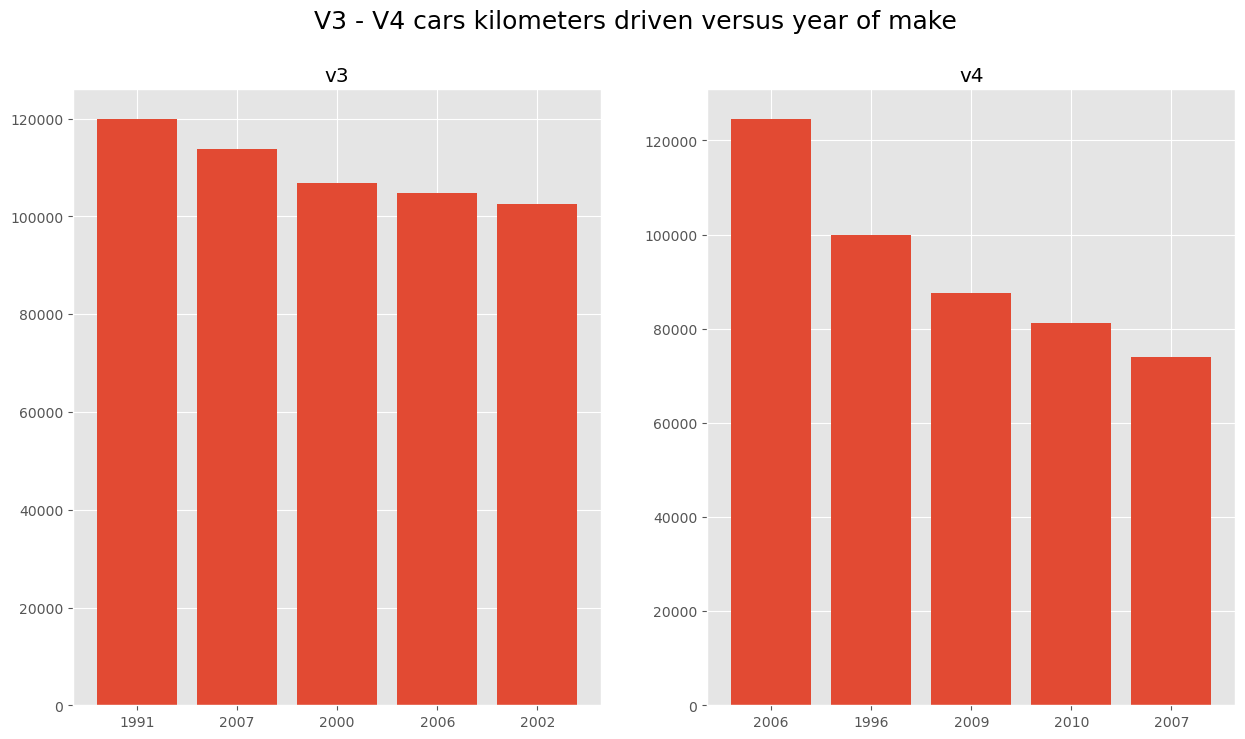

In [322]:

top_5_fueltank_names_v3 = pd.pivot_table(df_v3,values="km_driven",index='year',aggfunc="mean").sort_values(by="km_driven",ascending=False).head(5)
top_5_fueltank_names_v4 = pd.pivot_table(df_v4,values="Kilometer",index='Year',aggfunc="mean").sort_values(by="Kilometer",ascending=False).head(5)
fig,ax = plt.subplots(figsize = (15,8),nrows=1,ncols=2)

fig.suptitle("V3 - V4 cars kilometers driven versus year of make",fontsize=18)

ax[0].bar(np.arange(len(top_5_fueltank_names_v3)),top_5_fueltank_names_v3['km_driven'])
ax[0].set_xticks(np.arange(len(top_5_fueltank_names_v3)))
ax[0].set_xticklabels(top_5_fueltank_names_v3.index)
ax[0].set_title('v3')
ax[1].bar(np.arange(len(top_5_fueltank_names_v4)),top_5_fueltank_names_v4['Kilometer'])
ax[1].set_xticks(np.arange(len(top_5_fueltank_names_v4)))
ax[1].set_xticklabels(top_5_fueltank_names_v4.index)
ax[1].set_title('v4')

In [323]:
seats_price_v3 = df_v3[['seats','price in $']].groupby('seats').mean().sort_values(by='price in $',ascending=False).head(5)
seats_price_v4 = df_v4[['Seating Capacity','price in $']].groupby('Seating Capacity').mean().sort_values(by='price in $',ascending=False).head(5)

Text(0.5, 1.0, 'v4')

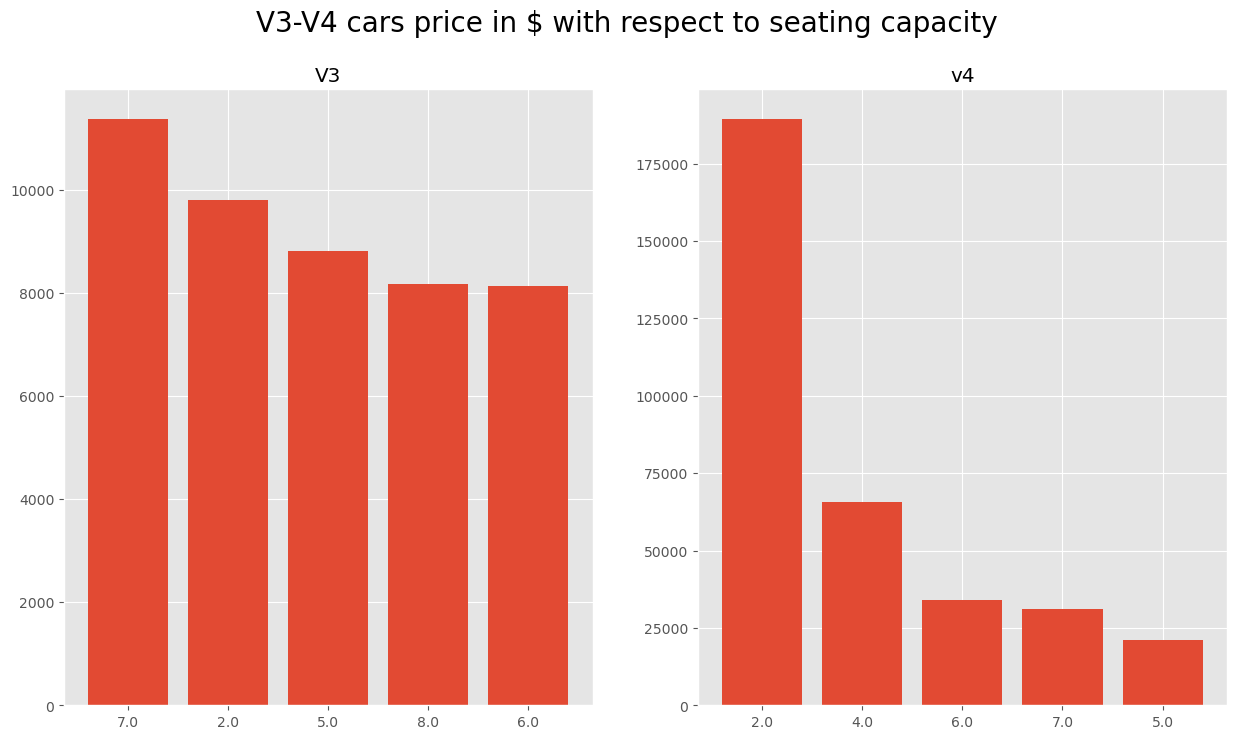

In [324]:
fig,ax = plt.subplots(figsize=(15,8),nrows=1,ncols=2)

fig.suptitle("V3-V4 cars price in $ with respect to seating capacity",fontsize=20)

ax[0].bar(np.arange(len(seats_price_v3)),seats_price_v3['price in $'])
ax[0].set_xticks(np.arange(len(seats_price_v3)))
ax[0].set_xticklabels(seats_price_v3.index)
ax[0].set_title("V3")
ax[1].bar(np.arange(len(seats_price_v4)),seats_price_v4['price in $'])
ax[1].set_xticks(np.arange(len(seats_price_v4)))
ax[1].set_xticklabels(seats_price_v4.index)
ax[1].set_title('v4')

Text(0.5, 1.0, 'v4')

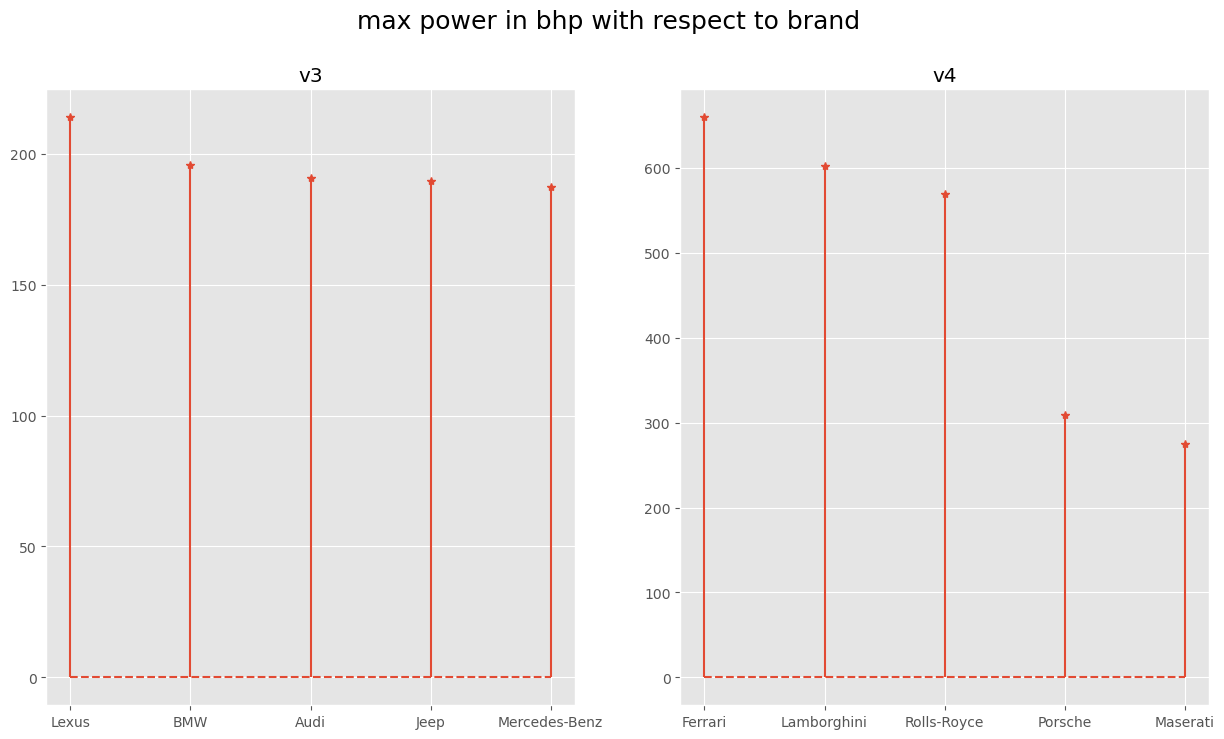

In [325]:
df_v3_maxpower_brand = df_v3[['max power in bhp',"Brand"]].groupby('Brand').mean().sort_values(by='max power in bhp',ascending=False).head(5)
df_v4_maxpower_brand = df_v4[['max power in bhp',"Brand"]].groupby('Brand').mean().sort_values(by='max power in bhp',ascending=False).head(5)

fig,ax = plt.subplots(figsize=(15,8),nrows=1,ncols=2)
fig.suptitle("max power in bhp with respect to brand",fontsize=18)

ax[0].stem(df_v3_maxpower_brand.index,df_v3_maxpower_brand['max power in bhp'],markerfmt='*',basefmt='--')
ax[0].set_title('v3')
ax[1].stem(df_v4_maxpower_brand.index,df_v4_maxpower_brand['max power in bhp'],markerfmt='*',basefmt='--')
ax[1].set_title('v4')

In [326]:
v3_transmission_brand = df_v3[['transmission','Brand']].groupby('transmission').value_counts()
top_5_automatic_v3_tr_brand = v3_transmission_brand.xs('Automatic',level=0).sort_values(ascending=False).head(5)
top_5_manual_v3_tr_brand = v3_transmission_brand.xs('Manual',level=0).sort_values(ascending=False).head(5)
v4_transmission_brand = df_v4[['Transmission','Brand']].groupby('Transmission').value_counts()
top_5_automatic_v4_tr_brand = v4_transmission_brand.xs('Automatic',level=0).sort_values(ascending=False).head(5)
top_5_manual_v4_tr_brand = v4_transmission_brand.xs('Manual',level=0).sort_values(ascending=False).head(5)


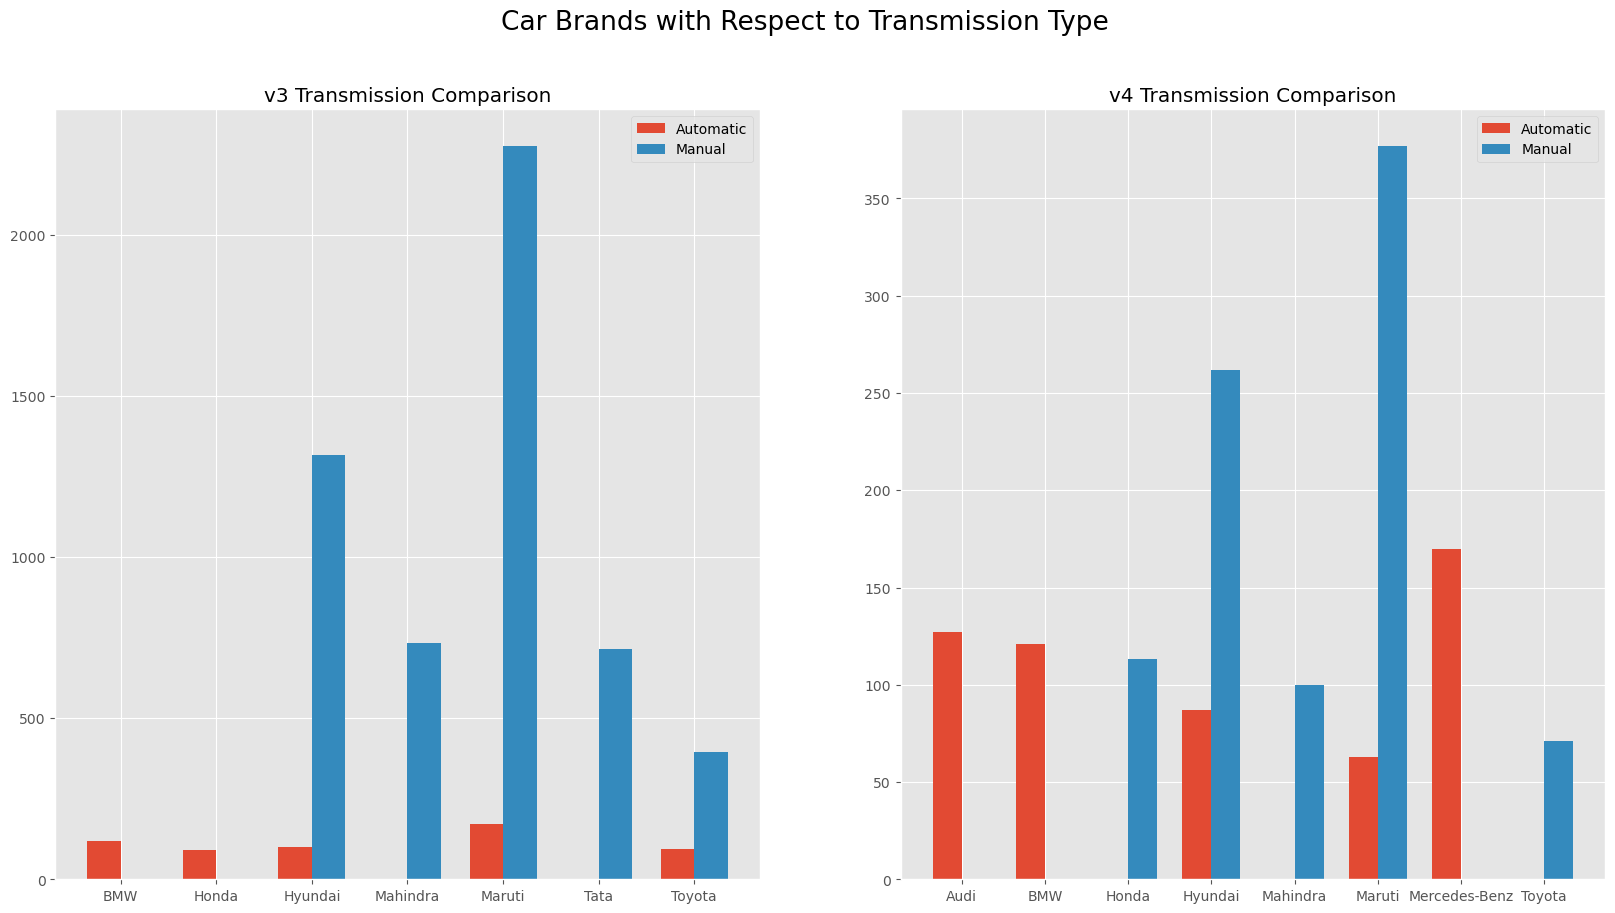

In [327]:

v3_combined = pd.DataFrame({
    'Automatic': top_5_automatic_v3_tr_brand,
    'Manual': top_5_manual_v3_tr_brand
}).fillna(0)

v4_combined = pd.DataFrame({
    'Automatic': top_5_automatic_v4_tr_brand,
    'Manual': top_5_manual_v4_tr_brand
}).fillna(0)

fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)
fig.suptitle('Car Brands with Respect to Transmission Type', fontsize=19)

bar_width = 0.35
index_v3 = np.arange(len(v3_combined))
index_v4 = np.arange(len(v4_combined))

ax[0].bar(index_v3, v3_combined['Automatic'], bar_width, label='Automatic')
ax[0].bar(index_v3 + bar_width, v3_combined['Manual'], bar_width, label='Manual')
ax[0].set_title('v3 Transmission Comparison')
ax[0].set_xticks(index_v3 + bar_width / 2)
ax[0].set_xticklabels(v3_combined.index)
ax[0].legend()

ax[1].bar(index_v4, v4_combined['Automatic'], bar_width, label='Automatic')
ax[1].bar(index_v4 + bar_width, v4_combined['Manual'], bar_width, label='Manual')
ax[1].set_title('v4 Transmission Comparison')
ax[1].set_xticks(index_v4 + bar_width / 2)
ax[1].set_xticklabels(v4_combined.index)
ax[1].legend()

plt.show()


In [328]:
pattern = r"(\d+\.?\d*)"

def extract_first_number(torque_str):
    if isinstance(torque_str, str):
        match = re.search(pattern, torque_str)
        return match.group(1) if match else None
    else:
        return None

df_v3['torque_values'] = df_v3['torque'].apply(extract_first_number)
df_v4['torque_values'] = df_v4['Max Torque'].apply(extract_first_number)

In [329]:
df_v3['torque_values'] = pd.to_numeric(df_v3['torque_values'], errors='coerce')
df_v4['torque_values'] = pd.to_numeric(df_v4['torque_values'], errors='coerce')

df_v3['max power in bhp'] = pd.to_numeric(df_v3['max power in bhp'], errors='coerce')
df_v4['max power in bhp'] = pd.to_numeric(df_v4['max power in bhp'], errors='coerce')


In [330]:
df_v3['torque_values'].fillna(df_v3['torque_values'].mean(),inplace=True)
df_v4['torque_values'].fillna(df_v4['torque_values'].mean(),inplace=True)
df_v3['max power in bhp'].fillna(df_v3['max power in bhp'].mean(),inplace=True)
df_v4['max power in bhp'].fillna(df_v4['max power in bhp'].mean(),inplace=True)

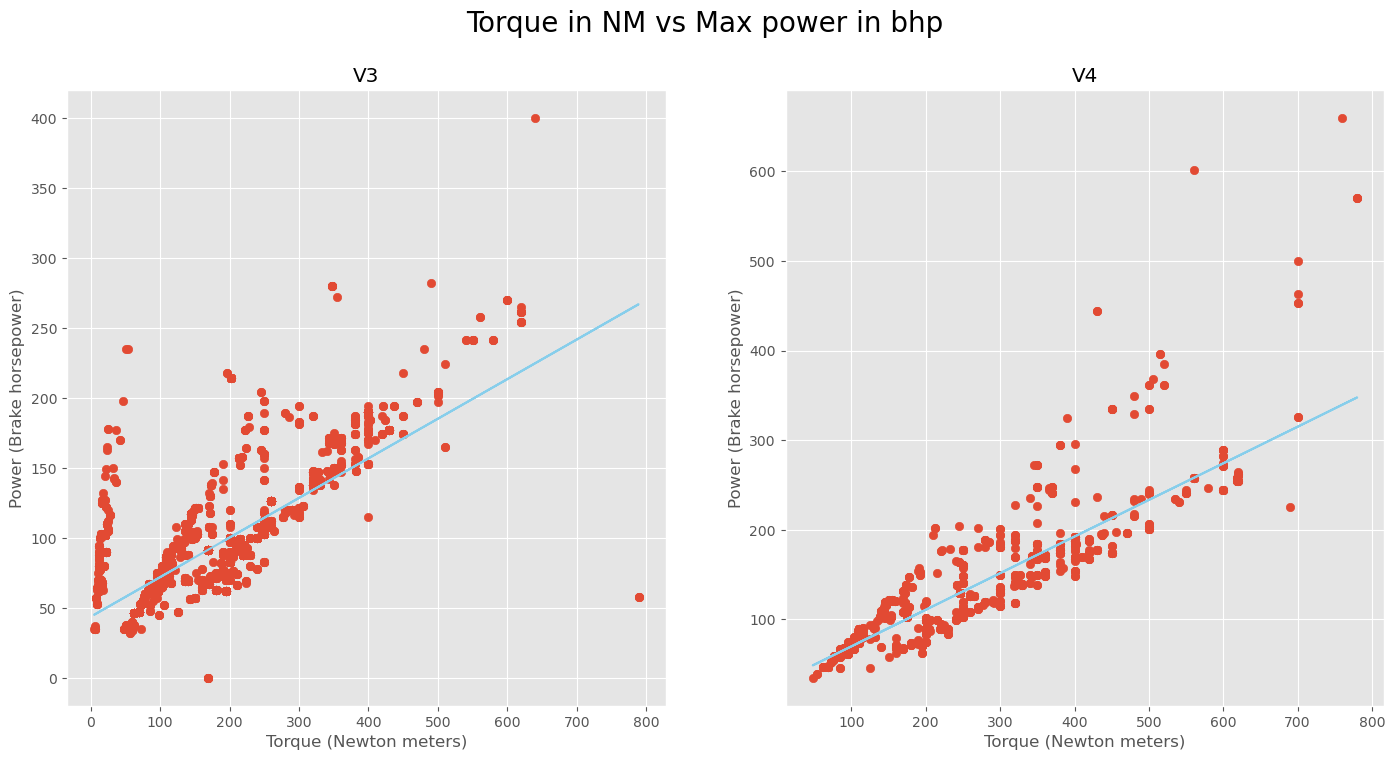

In [333]:
# Calculate trend lines for df_v3 and df_v4
slope_v3, intercept_v3 = np.polyfit(df_v3['torque_values'], df_v3['max power in bhp'], 1)
trend_line_v3 = slope_v3 * df_v3['torque_values'] + intercept_v3

slope_v4, intercept_v4 = np.polyfit(df_v4['torque_values'], df_v4['max power in bhp'], 1)
trend_line_v4 = slope_v4 * df_v4['torque_values'] + intercept_v4

fig, ax = plt.subplots(figsize=(17,8), nrows=1, ncols=2)
fig.suptitle("Torque in NM vs Max power in bhp", fontsize=20)

# V3 plot
ax[0].scatter(df_v3['torque_values'], df_v3['max power in bhp'])
ax[0].plot(df_v3['torque_values'], trend_line_v3, color='skyblue')
ax[0].set_xlabel("Torque (Newton meters)")
ax[0].set_ylabel("Power (Brake horsepower)")
ax[0].set_title('V3')

# V4 plot
ax[1].scatter(df_v4['torque_values'], df_v4['max power in bhp'])
ax[1].plot(df_v4['torque_values'], trend_line_v4, color='skyblue')
ax[1].set_xlabel("Torque (Newton meters)")
ax[1].set_ylabel("Power (Brake horsepower)")
ax[1].set_title('V4')

plt.show()
